In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import re

In [2]:
#coding UTF-8

### STEP 1: Load the data manually: pandas read csv takes all at once and lets the system crash for memory issues
# Here we read line by line in a memory friendly way and pre-filter for orders from germany only

#path_to_data = "C:\\Users\\mayrkat\\Documents\\master_thesis_adidas\\data\\"
path_to_data = "/Users/westepau/Downloads/"
# filename = "orders_germany_sixmonths_andpercentand_del.txt"  # old file name
filename = "six_months_order_hist_martoaug_adi_model_sh"
# filename = "six_month_order_mar_aug_100k_sample.txt"
delimiter = "&%&"
lines = []
country_index = 10

df = pd.read_csv(path_to_data + filename, delimiter=delimiter)


#### with the code below reading csv file can be done by hand, this might be useful to avoid memory issues.
# In case the data fits in memory is is recommended to use pandas built in functionality
# CAVEAT: the data-types need to be assigned manually if reading is done by hand.

def clean_line(line):
    # remove \n or \r\n from line endings
    if line[-2:] == "\r\n":
        return line[:-2]
    elif line[-1:] == "\n":
        return line[:-1]
    else:
        return line

    
    
#with open(path_to_data + filename, encoding="utf8") as f:  ## for python 3
#with open(path_to_data + filename) as f:
#    for idx, line in enumerate(f):
#        line = clean_line(line)
#        splitted_line = line.split(delimiter)
#        if splitted_line[10] == "DE" or idx == 0:  # filter for germany only
#            lines += [splitted_line]
#        if idx % 100000 == 0:
#            print("we're at index ", idx)
        
    
# check if all have the same length
# pd.Series([len(x) for x in lines]).value_counts()

# create pandas dataframe
# df = pd.DataFrame(data=lines[1:], columns=lines[0])

# since we have the df now, we can free the space that the lines-list took
# lines = 0

/Users/westepau/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [3]:
pd.set_option("display.max_columns", 250)
df.sample(15)  #yay

,DGROSSVALUE,DNETVALUE,DVATPERCENTAGE,IORDERHEADERID,IORDERLINEITEMID,IQUANTITY,IQUANTITYCANCELLED,IQUANTITYDELIVERED,IQUANTITYORDERED,IQUANTITYRETURNED,SARTICLECOUNTRY,SARTICLELANGUAGE,SARTICLENO,SARTICLESIZENO,SDISCOUNTTYPE,SMODELNO,SORDERITEMTYPE,SORDERLINEITEMNO,SORDERNO,SSTATUS,SSAPSTATUS,SSTATUSREMARK,TSCREATED,TSLASTMODIFIED,TSSTATUSDATE,DGROSSVALUEPERUNIT,DNETVALUEPERUNIT,DPRORATEDNETDISCOUNT,INETQUANTITYDELIVERED,SPROMOTIONDESCRIPTION,TSCANCELDATE,TSDELIVERYDATE,TSRETURNDATE,TSSHIPPINGDATE,DCURRENTRETAILPRICE,DRECOMMENDEDRETAILPRICE,DDISCOUNTPERCENTAGE,IORDERCOUNTER,SVOUCHERCODE,SVOUCHERDESCRIPTION,SRECIPEJSON,DDISCOUNTVALUE,DPRORATEDGROSSDISCOUNT,STRACKINGNUMBER,EXALASTMODIFIED,SPROMOTIONID,SPROMOTIONNAME,DBASEPRICE,DDISCOUNTEDLINEITEMPRICE,DGROSSPRICE,DPABASEPRICE,DPAGROSSPRICE,DPANETPRICE,DPATAX,DPATAXBASIS,DPATAXRATE,DPRORATEDGROSSBASEDISCOUNT,DPRORATEDNETBASEDISCOUNT,DPRORATEDTAXDISCOUNT,DTAX,DTAXBASIS,DTAXRATE,DTOTALPRICE,IOUANTITYPAID,IQUANTITYPAID,SCARRIERSERVICE,SCARRIERTRACKINGURL,SCOLOR,SCUSTPRODUCTCONFIGURL,SCUSTPRODUCTIMAGEURL,SCUSTPRODUCTSIZETYPE,SCUSTPRODUCTSIZEVALUE,SDETAILEDSHIPMENTSTATUSEXPTD,SDISPLAYSIZE,SGIFT,SIRECIPEID,SLINEITEMTEXT,SPALINEITEMTEXT,SPAYMENTSTATUS,SPRODUCTNAME,SSHIPPINGNODEDC,SSPLITSHIPMENTID,SSUBSTATUS,TSADDRESSVALIDATIONHOLD,TSCARRIEREXPECTEDDELIVERY,TSCARRIERLABELSCAN,TSCONSUMEREXPECTEDDELIVERY,TSDELIVERYATTEMPT,TSEXPORTTOOMS,TSEXPORTTOWMS,TSIMPORTTOOMS,TSIMPORTTOWMS,TSINBOUND,TSMANUALREVIEWHOLD,TSOMNIHUBESTDELIVERY,TSPAYMENTDATE,TSPODRECEIVED,TSREFUND,TSREMORSEHOLD,TSRETURNCOMPLETE,TSTAXHOLD,TSWMSPICKPACK,TSWMSPROCESSSTART,TSWMSTRUCKLOAD,SORDERPRODUCTTYPE,IARTICLEISONLINE,I_ARTICLEID,I_MODELID,SARTICLENAME,SARTICLENO.1,SCOLORWAYLONGDESC,SCOLORWAYSHORTDESC,SGENDERID,SPRODUCT_TITLE_FAMILY,SPRODUCT_TITLE_PREPEND,SRETAILEXITDATE,SRETAILINTRODATE,SSHOPNO,SSKU_TYPE,SURL_SLUG,TSCREATED.1,TSLASTMODIFIED.1,TSSELLFROM,EXALASTMODIFIED.1,SMANAGEMENTBRAND,SBUSINESSUNIT,SKEYCATEGORY,SBUSINESSSEGMENT,SPRODUCTLINE,SAGEGROUP,SARTICLELIFECYLE,SARTICLELIFECYCLEDATE,SDEVELOPMENTLOCATION,SDEVELOPMENTORGANIZATION,SDEVELOPER,SLODEVELOPER,SPRODUCTMANAGER,SDISTRIBUTIONCHANNEL,SCREATEDBY,SMODIFIEDBY,SARTICLETYPE,SCOLOR1,SCOLOR2,SCOLOR3,SCOLOR4,I_MODELID.1,SPRODUCTCATEGORY,SPRODUCTTYPE,SSPORTSCATEGORY
422370,19.95,16.1595,3.7905,523216635,1133441096,1,0,0,1,0,DE,DE,AY2842,4.056565e+12,NaN,NaN,NaN,3,ADE00114402,OPEN,NaN,NaN,"""2017-07-14 17:29:01.000000""","""2017-07-14 17:34:16.000000""",NaN,19.95,16.1595,0.00,0,NaN,NaN,NaN,NaN,NaN,19.95,0,0,0,NaN,NaN,NaN,0.0,0.00,NaN,"""2018-05-05 04:01:19.000000""",NaN,NaN,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.19,19.95,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,19773031,9029017,"""INF SL BX""",AY2842,"""Black/Shock Blue S16/Bold Blue""","""Black/Shock Blue S16/Bold Blue""",M,NaN,NaN,NaN,NaN,adidas,NaN,NaN,"""2015-08-08 02:02:33.000000""","""2018-05-09 00:19:54.000000""",NaN,"""2018-05-09 03:42:52.000000""",11.0,10.0,45.0,133.0,50.0,A,50.0,2015-12-07,10.0,T001,"""Grace, Rachel""","""Li, Peter""","""Baumann, Sybille""",NaN,NaN,"""SPM PRODUCTINTEGRATION""",1.0,NaN,NaN,NaN,NaN,9029017,M;Performance;Clothing;Swimming,Clothing,Swimming
1695483,59.95,50.3800,0.0000,479888039,1024951808,1,0,1,1,1,DE,NaN,AW5177,4.056565e+12,NaN,BTZ02,ATCL,3,ADE06966817,RETURNED,RETU,"""Too large / big""","""2017-03-23 15:36:34.000000""","""2017-04-05 17:09:22.000000""",NaN,59.95,50.3800,25.21,0,OUTLET-MARKDOWN-PERMANENT,NaN,"""2017-03-25 00:00:00.000000""","""2017-04-04 00:00:00.000000""",NaN,0.00,0,0,0,NaN,NaN,NaN,0.0,30.00,NaN,"""2018-05-05 04:01:19.000000""",onsite-markdown-all,NaN,89.95,59.95,0,-30.00,-30.00,-25.21,-4.79,-30.00,NaN,30.00,25.21,4.79,9.57,89.95,0.19,59.95,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""37 1/3""",False,NaN,"""10K Casual Schuh""",onsite-markdown-all,PAID,"""10K Casual Schuh""",NaN,ADE06966817,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df.columns.tolist()[-10:]

['SMODIFIEDBY',
 'SARTICLETYPE',
 'SCOLOR1',
 'SCOLOR2',
 'SCOLOR3',
 'SCOLOR4',
 'I_MODELID.1',
 'SPRODUCTCATEGORY',
 'SPRODUCTTYPE',
 'SSPORTSCATEGORY']

## Let's analyse our dataframe
### Orders + articles (join):
* filter WE, 6 months, article number!=null
* which columns are available?
* avg, min, max, median, numberNA, std, per interesting column for numeric variables
* histograms/piecharts for categorical variables + findings!
* check how often quantitydelivered=quantityordered-quantitycancelled-quantitiyreturned, also note: quantitiypaid
* voucher-available, promotions
* personalization
* category? After join on articles
* how old is the article based on SARTICLELIFECYCLEDATE 
* number of orders
* number of products ordered
* average price
* how often is a product sold / bestsellers
* bestsellers by country
* for every product determine the most (second third) likely product to be sold together
* in multiorders (i.e. more than one product ordered): were the products ordered different? From different categories? Which categories appear together?
* whole analysis once on order-basis once on customer-basis (14/30 days) (does the temporal order of orders matter)
* data cleansing: remove orders where a product was ordered in two different sizes.
* data cleansing: returns, maybe filter returns? 

#### available columns (and the ones we're interested in)
* DGROSSVALUE - __KEEP__
* DNETVALUE - __DROP__ for the customer the gross is important, not the net
* DVATPERCENTAGE - __DROP__ irrelevant for customer
* IORDERHEADERID - __KEEP__
* IORDERLINEITEMID - __KEEP__
* IQUANTITY - __KEEP__
* IQUANTITYCANCELLED - __KEEP__
* IQUANTITYDELIVERED - __KEEP__
* IQUANTITYORDERED - __KEEP__
* IQUANTITYRETURNED - __KEEP__
* SARTICLECOUNTRY - __KEEP__ (in future not only DE)
* SARTICLELANGUAGE - __DROP__ corrleates with country anyway and does not add obvious value.
* SARTICLENO - __KEEP__
* SARTICLESIZENO - __KEEP__
* SDISCOUNTTYPE - __KEEP__
* SMODELNO - __KEEP__
* SORDERITEMTYPE - __KEEP__
* SORDERLINEITEMNO - __KEEP__
* SORDERNO  - __KEEP__ - check if it's also unique, if so we can drop it and just keep orderheaderid
* SSTATUS - __KEEP__
* SSAPSTATUS - __DROP__ no need
* SSTATUSREMARK - __DROP__ no need
* TSCREATED - __KEEP__
* TSLASTMODIFIED - __DROP__ no need
* TSSTATUSDATE - __DROP__ no need
* DGROSSVALUEPERUNIT  - __KEEP__
* DNETVALUEPERUNIT - __DROP__
* DPRORATEDNETDISCOUNT - __KEEP__ check if it's the same as other discount columns
* INETQUANTITYDELIVERED - __KEEP__ 
* SPROMOTIONDESCRIPTION - __KEEP__ check if it corresponds to other discount columns
* TSCANCELDATE - __KEEP__ check if it corresponds quantitycancelled
* TSDELIVERYDATE - __KEEP__ same reason as canceldate
* TSRETURNDATE - __KEEP__ same reason as canceldate
* TSSHIPPINGDATE - __KEEP__ same reason as canceldate
* DCURRENTRETAILPRICE - __KEEP__
* DRECOMMENDEDRETAILPRICE - __KEEP__ maybe introduce a variable that it the difference between current and recommended retailprice
* DDISCOUNTPERCENTAGE - __KEEP__ compare to other discount cols
* IORDERCOUNTER - __KEEP__
* SVOUCHERCODE - __KEEP__ convert to boolean has-voucher column
* SVOUCHERDESCRIPTION - __DROP__ has-voucher is dervied from vouchercode, no need for this column
* SRECIPEJSON - __DROP__ not populated very often, information too complex if available
* DDISCOUNTVALUE - __KEEP__
* DPRORATEDGROSSDISCOUNT - __KEEP__
* STRACKINGNUMBER - __DROP__
* EXALASTMODIFIED - __DROP__
* SPROMOTIONID - __KEEP__
* SPROMOTIONNAME - __KEEP__
* DBASEPRICE - __KEEP__
* DDISCOUNTEDLINEITEMPRICE - __KEEP__
* DGROSSPRICE - __KEEP__
* DPABASEPRICE - __KEEP__
* DPAGROSSPRICE - __KEEP__
* DPANETPRICE - __KEEP__
* DPATAX - __KEEP__
* DPATAXBASIS - __KEEP__
* DPATAXRATE - __KEEP__
* DPRORATEDGROSSBASEDISCOUNT - __KEEP__
* DPRORATEDNETBASEDISCOUNT - __KEEP__
* DPRORATEDTAXDISCOUNT - __KEEP__
* DTAX - __KEEP__
* DTAXBASIS - __KEEP__
* DTAXRATE - __KEEP__
* DTOTALPRICE - __KEEP__
* IOUANTITYPAID - __KEEP__
* IQUANTITYPAID - __KEEP__
* SCARRIERSERVICE - __DROP__
* SCARRIERTRACKINGURL - __DROP__
* SCOLOR - __KEEP__
* SCUSTPRODUCTCONFIGURL - __KEEP__
* SCUSTPRODUCTIMAGEURL - __KEEP__
* SCUSTPRODUCTSIZETYPE - __KEEP__
* SCUSTPRODUCTSIZEVALUE - __KEEP__
* SDETAILEDSHIPMENTSTATUSEXPTD - __KEEP__
* SDISPLAYSIZE - __KEEP__
* SGIFT - __KEEP__
* SIRECIPEID - __DROP__
* SLINEITEMTEXT - __KEEP__
* SPALINEITEMTEXT - __KEEP__
* SPAYMENTSTATUS - __KEEP__
* SPRODUCTNAME - __KEEP__
* SSHIPPINGNODEDC - __DROP__
* SSPLITSHIPMENTID - __DROP__
* SSUBSTATUS - __DROP__
* TSADDRESSVALIDATIONHOLD - __DROP__
* TSCARRIEREXPECTEDDELIVERY - __DROP__
* TSCARRIERLABELSCAN - __DROP__
* TSCONSUMEREXPECTEDDELIVERY - __DROP__
* TSDELIVERYATTEMPT - __DROP__
* TSEXPORTTOOMS - __DROP__
* TSEXPORTTOWMS - __DROP__
* TSIMPORTTOOMS - __DROP__
* TSIMPORTTOWMS - __DROP__
* TSINBOUND - __DROP__
* TSMANUALREVIEWHOLD - __DROP__
* TSOMNIHUBESTDELIVERY - __DROP__
* TSPAYMENTDATE - __DROP__
* TSPODRECEIVED - __DROP__
* TSREFUND - __DROP__
* TSREMORSEHOLD - __DROP__
* TSRETURNCOMPLETE - __DROP__
* TSTAXHOLD - __DROP__
* TSWMSPICKPACK - __DROP__
* TSWMSPROCESSSTART - __DROP__
* TSWMSTRUCKLOAD - __DROP__
* SORDERPRODUCTTYPE - __KEEP__
* IARTICLEISONLINE - __KEEP__
* I_ARTICLEID - __KEEP__
* I_MODELID - __KEEP__
* SARTICLENAME - __KEEP__
* SARTICLENO - __KEEP__
* SCOLORWAYLONGDESC - __KEEP__
* SCOLORWAYSHORTDESC - __KEEP__
* SGENDERID - __KEEP__
* SPRODUCT_TITLE_FAMILY - __KEEP__
* SPRODUCT_TITLE_PREPEND - __KEEP__
* SRETAILEXITDATE - __KEEP__ derive attributes if availability in retail store is relevant for the recommendation
* SRETAILINTRODATE - __KEEP__
* SSHOPNO - __KEEP__
* SSKU_TYPE - __DROP__
* SURL_SLUG - __DROP__
* TSCREATED - __KEEP__
* TSLASTMODIFIED - __KEEP__
* TSSELLFROM - __DROP__
* EXALASTMODIFIED - __DROP__
* SMANAGEMENTBRAND - __KEEP__
* SBUSINESSUNIT - __KEEP__
* SKEYCATEGORY - __KEEP__
* SBUSINESSSEGMENT - __KEEP__
* SPRODUCTLINE - __KEEP__
* SAGEGROUP - __KEEP__
* SARTICLELIFECYLE - __KEEP__
* SARTICLELIFECYCLEDATE - __KEEP__
* SDEVELOPMENTLOCATION - __KEEP__
* SDEVELOPMENTORGANIZATION - __KEEP__
* SDEVELOPER - __DROP__
* SLODEVELOPER - __DROP__
* SPRODUCTMANAGER - __DROP__
* SDISTRIBUTIONCHANNEL - __KEEP__
* SCREATEDBY - __DROP__
* SMODIFIEDBY - __DROP__
* SARTICLETYPE - __KEEP__
* I_MODELID.1 - __DROP__
* SPRODUCTCATEGORY - __KEEP__
* SPRODUCTTYPE - __KEEP__
* SSPORTSCATEGORY - __KEEP__

In [5]:
cols_str = """
* DGROSSVALUE - __KEEP__
* DNETVALUE - __DROP__ for the customer the gross is important, not the net
* DVATPERCENTAGE - __DROP__ irrelevant for customer
* IORDERHEADERID - __KEEP__
* IORDERLINEITEMID - __KEEP__
* IQUANTITY - __KEEP__
* IQUANTITYCANCELLED - __KEEP__
* IQUANTITYDELIVERED - __KEEP__
* IQUANTITYORDERED - __KEEP__
* IQUANTITYRETURNED - __KEEP__
* SARTICLECOUNTRY - __KEEP__ (in future not only DE)
* SARTICLELANGUAGE - __DROP__ corrleates with country anyway and does not add obvious value.
* SARTICLENO - __KEEP__
* SARTICLESIZENO - __KEEP__
* SDISCOUNTTYPE - __KEEP__
* SMODELNO - __KEEP__
* SORDERITEMTYPE - __KEEP__
* SORDERLINEITEMNO - __KEEP__
* SORDERNO  - __KEEP__ - check if it's also unique, if so we can drop it and just keep orderheaderid
* SSTATUS - __KEEP__
* SSAPSTATUS - __DROP__ no need
* SSTATUSREMARK - __DROP__ no need
* TSCREATED - __KEEP__
* TSLASTMODIFIED - __DROP__ no need
* TSSTATUSDATE - __DROP__ no need
* DGROSSVALUEPERUNIT  - __KEEP__
* DNETVALUEPERUNIT - __DROP__
* DPRORATEDNETDISCOUNT - __KEEP__ check if it's the same as other discount columns
* INETQUANTITYDELIVERED - __KEEP__ 
* SPROMOTIONDESCRIPTION - __KEEP__ check if it corresponds to other discount columns
* TSCANCELDATE - __KEEP__ check if it corresponds quantitycancelled
* TSDELIVERYDATE - __KEEP__ same reason as canceldate
* TSRETURNDATE - __KEEP__ same reason as canceldate
* TSSHIPPINGDATE - __KEEP__ same reason as canceldate
* DCURRENTRETAILPRICE - __KEEP__
* DRECOMMENDEDRETAILPRICE - __KEEP__ maybe introduce a variable that it the difference between current and recommended retailprice
* DDISCOUNTPERCENTAGE - __KEEP__ compare to other discount cols
* IORDERCOUNTER - __KEEP__
* SVOUCHERCODE - __KEEP__ convert to boolean has-voucher column
* SVOUCHERDESCRIPTION - __DROP__ has-voucher is dervied from vouchercode, no need for this column
* SRECIPEJSON - __DROP__ not populated very often, information too complex if available
* DDISCOUNTVALUE - __KEEP__
* DPRORATEDGROSSDISCOUNT - __KEEP__
* STRACKINGNUMBER - __DROP__
* EXALASTMODIFIED - __DROP__
* SPROMOTIONID - __KEEP__
* SPROMOTIONNAME - __KEEP__
* DBASEPRICE - __KEEP__
* DDISCOUNTEDLINEITEMPRICE - __KEEP__
* DGROSSPRICE - __KEEP__
* DPABASEPRICE - __KEEP__
* DPAGROSSPRICE - __KEEP__
* DPANETPRICE - __KEEP__
* DPATAX - __KEEP__
* DPATAXBASIS - __KEEP__
* DPATAXRATE - __KEEP__
* DPRORATEDGROSSBASEDISCOUNT - __KEEP__
* DPRORATEDNETBASEDISCOUNT - __KEEP__
* DPRORATEDTAXDISCOUNT - __KEEP__
* DTAX - __KEEP__
* DTAXBASIS - __KEEP__
* DTAXRATE - __KEEP__
* DTOTALPRICE - __KEEP__
* IOUANTITYPAID - __KEEP__
* IQUANTITYPAID - __KEEP__
* SCARRIERSERVICE - __DROP__
* SCARRIERTRACKINGURL - __DROP__
* SCOLOR - __KEEP__
* SCUSTPRODUCTCONFIGURL - __KEEP__
* SCUSTPRODUCTIMAGEURL - __KEEP__
* SCUSTPRODUCTSIZETYPE - __KEEP__
* SCUSTPRODUCTSIZEVALUE - __KEEP__
* SDETAILEDSHIPMENTSTATUSEXPTD - __KEEP__
* SDISPLAYSIZE - __KEEP__
* SGIFT - __KEEP__
* SIRECIPEID - __DROP__
* SLINEITEMTEXT - __KEEP__
* SPALINEITEMTEXT - __KEEP__
* SPAYMENTSTATUS - __KEEP__
* SPRODUCTNAME - __KEEP__
* SSHIPPINGNODEDC - __DROP__
* SSPLITSHIPMENTID - __DROP__
* SSUBSTATUS - __DROP__
* TSADDRESSVALIDATIONHOLD - __DROP__
* TSCARRIEREXPECTEDDELIVERY - __DROP__
* TSCARRIERLABELSCAN - __DROP__
* TSCONSUMEREXPECTEDDELIVERY - __DROP__
* TSDELIVERYATTEMPT - __DROP__
* TSEXPORTTOOMS - __DROP__
* TSEXPORTTOWMS - __DROP__
* TSIMPORTTOOMS - __DROP__
* TSIMPORTTOWMS - __DROP__
* TSINBOUND - __DROP__
* TSMANUALREVIEWHOLD - __DROP__
* TSOMNIHUBESTDELIVERY - __DROP__
* TSPAYMENTDATE - __DROP__
* TSPODRECEIVED - __DROP__
* TSREFUND - __DROP__
* TSREMORSEHOLD - __DROP__
* TSRETURNCOMPLETE - __DROP__
* TSTAXHOLD - __DROP__
* TSWMSPICKPACK - __DROP__
* TSWMSPROCESSSTART - __DROP__
* TSWMSTRUCKLOAD - __DROP__
* SORDERPRODUCTTYPE - __KEEP__
* IARTICLEISONLINE - __KEEP__
* I_ARTICLEID - __KEEP__
* I_MODELID - __KEEP__
* SARTICLENAME - __KEEP__
* SARTICLENO - __KEEP__
* SCOLORWAYLONGDESC - __KEEP__
* SCOLORWAYSHORTDESC - __KEEP__
* SGENDERID - __KEEP__
* SPRODUCT_TITLE_FAMILY - __KEEP__
* SPRODUCT_TITLE_PREPEND - __KEEP__
* SRETAILEXITDATE - __KEEP__ derive attributes if availability in retail store is relevant for the recommendation
* SRETAILINTRODATE - __KEEP__
* SSHOPNO - __KEEP__
* SSKU_TYPE - __DROP__
* SURL_SLUG - __DROP__
* TSCREATED - __KEEP__
* TSLASTMODIFIED - __KEEP__
* TSSELLFROM - __DROP__
* EXALASTMODIFIED - __DROP__
* SMANAGEMENTBRAND - __KEEP__
* SBUSINESSUNIT - __KEEP__
* SKEYCATEGORY - __KEEP__
* SBUSINESSSEGMENT - __KEEP__
* SPRODUCTLINE - __KEEP__
* SAGEGROUP - __KEEP__
* SARTICLELIFECYLE - __KEEP__
* SARTICLELIFECYCLEDATE - __KEEP__
* SDEVELOPMENTLOCATION - __KEEP__
* SDEVELOPMENTORGANIZATION - __KEEP__
* SDEVELOPER - __DROP__
* SLODEVELOPER - __DROP__
* SPRODUCTMANAGER - __DROP__
* SDISTRIBUTIONCHANNEL - __KEEP__
* SCREATEDBY - __DROP__
* SMODIFIEDBY - __DROP__
* SARTICLETYPE - __KEEP__
* I_MODELID.1 - __DROP__
* SPRODUCTCATEGORY - __KEEP__
* SPRODUCTTYPE - __KEEP__
* SSPORTSCATEGORY - __KEEP__
"""  ## copy paste this from the markdown above, never change this code alone.
cols_to_keep = [c[2:c.find(" - ")].strip() for c in cols_str.split("\n") if "__KEEP__" in c]  # for windows \r\n

In [6]:
df_sel = df[cols_to_keep]

In [7]:
df = 0  ## free memory of df

In [8]:
# get statistics for numeric columns
numeric_types = ["float64", "int64", ]
numeric_cols = [c for c, t in zip(df_sel.columns, df_sel.dtypes) if str(t) in numeric_types]
numeric_describe_df = df_sel[numeric_cols].describe()
numeric_describe_df

,DGROSSVALUE,IORDERHEADERID,IORDERLINEITEMID,IQUANTITY,IQUANTITYCANCELLED,IQUANTITYDELIVERED,IQUANTITYORDERED,IQUANTITYRETURNED,SARTICLESIZENO,SDISCOUNTTYPE,SORDERLINEITEMNO,DGROSSVALUEPERUNIT,DPRORATEDNETDISCOUNT,INETQUANTITYDELIVERED,TSCANCELDATE,DCURRENTRETAILPRICE,DRECOMMENDEDRETAILPRICE,DDISCOUNTPERCENTAGE,IORDERCOUNTER,DDISCOUNTVALUE,DPRORATEDGROSSDISCOUNT,DBASEPRICE,DDISCOUNTEDLINEITEMPRICE,DGROSSPRICE,DPABASEPRICE,DPAGROSSPRICE,DPANETPRICE,DPATAX,DPATAXBASIS,DPATAXRATE,DPRORATEDGROSSBASEDISCOUNT,DPRORATEDNETBASEDISCOUNT,DPRORATEDTAXDISCOUNT,DTAX,DTAXBASIS,DTAXRATE,DTOTALPRICE,IOUANTITYPAID,IQUANTITYPAID,SCOLOR,SDETAILEDSHIPMENTSTATUSEXPTD,SORDERPRODUCTTYPE,I_ARTICLEID,I_MODELID,SPRODUCT_TITLE_FAMILY,SPRODUCT_TITLE_PREPEND,SRETAILEXITDATE,SRETAILINTRODATE,SMANAGEMENTBRAND,SBUSINESSUNIT,SKEYCATEGORY,SBUSINESSSEGMENT,SPRODUCTLINE,SARTICLELIFECYLE,SDEVELOPMENTLOCATION,SDISTRIBUTIONCHANNEL,SARTICLETYPE
count,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.043080e+06,0.0,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,0.0,2.061496e+06,2061496.0,2061496.0,2061496.0,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2061496.0,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,0.0,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2.061496e+06,2061496.0,2.061496e+06,0.0,0.0,0.0,2.061496e+06,2.061496e+06,159748.0,159748.0,0.0,0.0,2.055248e+06,2.055248e+06,2.057051e+06,2.057051e+06,2.055248e+06,2.055248e+06,2.055248e+06,1.329785e+06,2.055248e+06
mean,5.735644e+01,5.059514e+08,1.090370e+09,1.021968e+00,4.235807e-02,9.860548e-01,1.021968e+00,3.722176e-01,4.044660e+12,NaN,2.512887e+00,5.674253e+01,1.512054e+01,5.913642e-01,NaN,7.583947e-01,0.0,0.0,0.0,1.094105e-01,1.810290e+01,7.385443e+01,5.829029e+01,0.0,-1.575151e+01,-1.575151e+01,-1.323651e+01,-2.514999e+00,-1.575151e+01,NaN,1.776088e+01,1.492507e+01,2.872948e+00,9.054505e+00,7.470094e+01,1.900000e-01,5.959823e+01,0.0,9.418883e-01,NaN,NaN,NaN,3.000530e+07,1.480001e+07,0.0,0.0,NaN,NaN,1.311140e+01,4.557792e+01,2.731696e+01,2.191138e+02,2.547037e+02,5.000506e+01,1.578105e+01,2.667193e+01,1.037311e+00
std,4.232213e+01,1.981102e+07,4.918493e+07,2.217676e-01,2.153355e-01,2.869880e-01,2.217676e-01,4.933221e-01,2.584112e+11,NaN,2.640698e+00,4.157230e+01,1.786484e+01,5.416494e-01,NaN,7.859388e+00,0.0,0.0,0.0,1.914203e+00,2.125281e+01,4.567527e+01,4.200640e+01,0.0,1.977907e+01,1.977907e+01,1.662103e+01,3.158047e+00,1.977907e+01,NaN,2.080744e+01,1.748518e+01,3.394403e+00,6.801185e+00,4.672008e+01,2.085665e-12,4.247731e+01,0.0,3.428844e-01,NaN,NaN,NaN,1.005607e+07,6.604728e+06,0.0,0.0,NaN,NaN,5.519073e+00,2.764385e+01,3.058448e+01,1.452454e+02,1.655609e+02,2.954858e-01,1.796886e+01,1.895442e+01,3.788684e-01
min,0.000000e+00,4.690449e+08,1.004419e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.487100e+10,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-7.000000e+02,-7.000000e+02,-5.882400e+02,-1.117600e+02,-7.000000e+02,NaN,0.000000e+00,0.000000e+00,-1.000000e-02,-2.000000e-02,0.000000e+00,1.900000e-01,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,3.254114e+06,1.412800e+06,0.0,0.0,NaN,NaN,1.100000e+01,3.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,4.000000e+01,8.000000e+00,0.000000e+00,1.000000e+00
25%,2.795000e+01,4.881580e+08,1.044389e+09,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.057282e+12,NaN,1.000000e+00,2.748000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,3.795000e+01,2.796000e+01,0.0,-2.638000e+01,-2.638000e+01,-2.217000e+01,-4.210000e+00,-2.638000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.380000e+00,3.990000e+01,1.900000e-01,2.971000e+01,0.0,1.000000e+00,NaN,NaN,NaN,2.414391e+07,9.836166e+06,0.0,0.0,NaN,NaN,1.100000e+01,1.400000e+01,9.000000e+00,5.400000e+01,1.760000e+02,5.000000e+01,1.000000e+

In [9]:
# find columns with std-dev=0, i.e. always the same value
numeric_describe_df.transpose()[(numeric_describe_df.transpose()["std"] < 1e-10) | (numeric_describe_df.transpose()["count"] == 0)]


,count,mean,std,min,25%,50%,75%,max
SDISCOUNTTYPE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSCANCELDATE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRECOMMENDEDRETAILPRICE,2061496.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
DDISCOUNTPERCENTAGE,2061496.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
IORDERCOUNTER,2061496.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
DGROSSPRICE,2061496.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
DPATAXRATE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTAXRATE,2061496.0,0.19,2.085665e-12,0.19,0.19,0.19,0.19,0.19
IOUANTITYPAID,2061496.0,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
SCOLOR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cols_to_drop = """SDISCOUNTTYPE
TSCANCELDATE
DCURRENTRETAILPRICE
DRECOMMENDEDRETAILPRICE
DDISCOUNTPERCENTAGE
IORDERCOUNTER
DDISCOUNTVALUE
DGROSSPRICE
IOUANTITYPAID
DPATAXRATE
SCOLOR
SDETAILEDSHIPMENTSTATUSEXPTD
SRETAILEXITDATE
SRETAILINTRODATE
DTAXRATE""".split("\n")

In [11]:
len(cols_to_drop), len(numeric_cols)

(15, 57)

In [12]:
useful_numeric_cols = [c for c in numeric_cols if c not in cols_to_drop]

In [13]:
tax_cols = [c for c in useful_numeric_cols if "TAX" in c]
id_cols = [c for c in useful_numeric_cols if "ID" in c if c != "IQUANTITYPAID"]
pricing_cols = [c for c in useful_numeric_cols if "DISCOUNT" in c or "PRICE" in c] + ['DGROSSVALUE']
quantity_cols = [c for c in useful_numeric_cols if "QUANTITY" in c]

In [14]:
print "tax columns: ", len(tax_cols), "  ", tax_cols
print "id columns: ", len(id_cols), "  ", id_cols
print "pricing columns: ", len(pricing_cols), "  ", pricing_cols
print "quantity columns: ", len(quantity_cols), "  ", quantity_cols


tax columns:  5    ['DPATAX', 'DPATAXBASIS', 'DPRORATEDTAXDISCOUNT', 'DTAX', 'DTAXBASIS']
id columns:  4    ['IORDERHEADERID', 'IORDERLINEITEMID', 'I_ARTICLEID', 'I_MODELID']
pricing columns:  12    ['DPRORATEDNETDISCOUNT', 'DPRORATEDGROSSDISCOUNT', 'DBASEPRICE', 'DDISCOUNTEDLINEITEMPRICE', 'DPABASEPRICE', 'DPAGROSSPRICE', 'DPANETPRICE', 'DPRORATEDGROSSBASEDISCOUNT', 'DPRORATEDNETBASEDISCOUNT', 'DPRORATEDTAXDISCOUNT', 'DTOTALPRICE', 'DGROSSVALUE']
quantity columns:  7    ['IQUANTITY', 'IQUANTITYCANCELLED', 'IQUANTITYDELIVERED', 'IQUANTITYORDERED', 'IQUANTITYRETURNED', 'INETQUANTITYDELIVERED', 'IQUANTITYPAID']


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numeric_describe_df[tax_cols]

,DPATAX,DPATAXBASIS,DPRORATEDTAXDISCOUNT,DTAX,DTAXBASIS
count,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00
mean,-2.51,-15.75,2.87,9.05,74.70
std,3.16,19.78,3.39,6.80,46.72
min,-111.76,-700.00,-0.01,-0.02,0.00
25%,-4.21,-26.38,0.00,4.38,39.90
50%,-1.60,-10.00,1.92,7.18,64.95
75%,0.00,0.00,4.49,11.61,99.95
max,6.16,38.55,139.68,145.24,1399.50


The values for the taxes seem more or less correct (eg avg order is 80 euros). Strange things are:  
- min of dtax columns is negative (only two cents but still negative)
- dproratedtaxdiscount = tax discount on item (dpatax) + tax discount on order level 
- tax-basis does not seem to be the basis but rather a gross price (at least they often end on .95 or x9.95 eur)
- dtax is not 19% of dtaxbasis but varies for every row, neither for totalprice
- if a discount was applied dptaxbasis is the total discount on the gross, dptax is the tax-discount

In [16]:
numeric_describe_df[sorted(pricing_cols)]

,DBASEPRICE,DDISCOUNTEDLINEITEMPRICE,DGROSSVALUE,DPABASEPRICE,DPAGROSSPRICE,DPANETPRICE,DPRORATEDGROSSBASEDISCOUNT,DPRORATEDGROSSDISCOUNT,DPRORATEDNETBASEDISCOUNT,DPRORATEDNETDISCOUNT,DPRORATEDTAXDISCOUNT,DTOTALPRICE
count,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00
mean,73.85,58.29,57.36,-15.75,-15.75,-13.24,17.76,18.10,14.93,15.12,2.87,59.60
std,45.68,42.01,42.32,19.78,19.78,16.62,20.81,21.25,17.49,17.86,3.39,42.48
min,0.00,0.00,0.00,-700.00,-700.00,-588.24,0.00,0.00,0.00,0.00,-0.01,0.00
25%,37.95,27.96,27.95,-26.38,-26.38,-22.17,0.00,0.00,0.00,0.00,0.00,29.71
50%,64.95,48.96,45.46,-10.00,-10.00,-8.40,11.99,12.30,10.08,10.08,1.92,49.95
75%,99.95,76.46,74.14,0.00,0.00,0.00,27.48,28.49,23.09,23.60,4.49,76.96
max,549.95,549.95,909.65,38.55,38.55,32.39,292.47,874.87,245.77,735.19,139.68,909.65


there are no obvious corrupted data  
findings:
- as expected proratednetdiscount * 1.19 = grossdiscount
- df_sel["DPAGROSSPRICE"] == df_sel["DPABASEPRICE"]


open questions:
- difference between dproratedgross(net)__base__discount and dproratedgross(net)discount, according to docs they should be the same, but in the data only in 99% of cases
- difference between df_sel["DTOTALPRICE"] and df_sel["DDISCOUNTEDLINEITEMPRICE"]. They are the same in most cases (98%). Differences might come from shipping costs. Discountedlineitemprice is a field for tx emails only, should not be used by us.

In [17]:
numeric_describe_df[sorted(quantity_cols)]

,INETQUANTITYDELIVERED,IQUANTITY,IQUANTITYCANCELLED,IQUANTITYDELIVERED,IQUANTITYORDERED,IQUANTITYPAID,IQUANTITYRETURNED
count,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00,2061496.00
mean,0.59,1.02,0.04,0.99,1.02,0.94,0.37
std,0.54,0.22,0.22,0.29,0.22,0.34,0.49
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,0.00,1.00,0.00,1.00,1.00,1.00,0.00
50%,1.00,1.00,0.00,1.00,1.00,1.00,0.00
75%,1.00,1.00,0.00,1.00,1.00,1.00,1.00
max,16.00,20.00,10.00,20.00,20.00,20.00,20.00


In [18]:
# netdelivered + returned = delivered
print (df_sel["INETQUANTITYDELIVERED"] + df_sel["IQUANTITYRETURNED"] - df_sel["IQUANTITYDELIVERED"]).value_counts()
# answer no!
# netdelivered + returned + cancelled = delivered
(df_sel["INETQUANTITYDELIVERED"] + df_sel["IQUANTITYRETURNED"] + df_sel["IQUANTITYCANCELLED"] - df_sel["IQUANTITYDELIVERED"]).value_counts()
# answer no!


 0    2014181
-1      44892
 1       1312
-2        750
-3        131
-8         65
-4         55
 2         40
-5         36
-7          8
-6          7
 3          7
 4          6
 6          2
 5          2
 7          1
 9          1
dtype: int64


0     2021727
1       38963
2         628
3          94
4          35
5          17
10         15
6           8
7           6
9           3
dtype: int64

In [19]:
(df_sel["IQUANTITYCANCELLED"] + df_sel["INETQUANTITYDELIVERED"] + df_sel["IQUANTITYRETURNED"] - df_sel["IQUANTITY"]).value_counts()

 0    2028464
-1      33022
-2         10
dtype: int64

In [20]:
df_sel[["IQUANTITYCANCELLED", "INETQUANTITYDELIVERED", "IQUANTITYRETURNED", "IQUANTITY"]][(df_sel["IQUANTITYCANCELLED"] + df_sel["INETQUANTITYDELIVERED"] + df_sel["IQUANTITYRETURNED"] - df_sel["IQUANTITY"]) < 0].head(10)

,IQUANTITYCANCELLED,INETQUANTITYDELIVERED,IQUANTITYRETURNED,IQUANTITY
25,0,0,0,1
128,0,0,0,1
498,0,0,0,1
540,0,0,0,1
541,0,0,0,1
566,0,0,0,1
603,0,0,0,1
750,0,0,0,1
773,0,0,0,1
803,0,0,0,1


Potential Problems:  
- negative net quantity delivered
- (df_sel["IQUANTITYCANCELLED"] + df_sel["INETQUANTITYDELIVERED"] + df_sel["IQUANTITYRETURNED"] - df_sel["IQUANTITY"]) is 0 for all but 370 cases, these cases occur at any time. This ight be a data problem
- netdelivered + returned = delivered
- netdelivered + returned + cancelled = delivered
Findings:
- df_sel["IQUANTITY"] == df_sel["IQUANTITYORDERED"]
- IQUANTITIYCANCELLED means cancelled by warenhouse, not by customer.

### Let's proceed with the remaining numeric columns
1. check if they are really numeric - there are some categoric columns that are encoded into numeric ones
2. those can be found by doing a count distinct

In [21]:
remaining_cols = sorted(list(set(useful_numeric_cols).difference(set(tax_cols + id_cols + pricing_cols + quantity_cols))))

In [22]:
df_sel["dummy"] = [1] * len(df_sel)

df_sel.groupby("dummy")[remaining_cols].nunique().transpose()

dummy,1
DGROSSVALUEPERUNIT,5810
SARTICLELIFECYLE,3
SARTICLESIZENO,137086
SARTICLETYPE,4
SBUSINESSSEGMENT,94
SBUSINESSUNIT,33
SDEVELOPMENTLOCATION,16
SDISTRIBUTIONCHANNEL,39
SKEYCATEGORY,29
SMANAGEMENTBRAND,3


Most variables (except grossvalueperunit) are categoric. For the articlesizeno we also think that it is categoric, but it is irrelevant anyway since it does not look like it could be important for models.

In [23]:
# convert cols to categoric columns
cols_to_convert = [c for c in remaining_cols if c not in ("DGROSSVALUEPERUNIT", "SARTICLESIZENO")]
for col_to_convert in cols_to_convert:
    df_sel[col_to_convert] = df_sel[col_to_convert].map(lambda x: str(x))

In [25]:
cols_to_drop = cols_to_drop + ["SARTICLESIZENO"]
df_sel = df_sel[[c for c in df_sel.columns if c not in cols_to_drop]]

In [26]:
def rename_cols(current_cols, current_idx):
    """
There is the problem of columns with the same name. We want to drop these. 
Unfortunately we cannot index them since they have the same name.
Hence we need to rename them first.
This function gives new unique names to columns and makes it easy to drop the superfluous ones.
"""
    try:
        if current_cols[current_idx] in current_cols[:current_idx]:
            current_cols[current_idx] +=  "__" + str(current_idx)
        return rename_cols(current_cols, current_idx + 1)
    except IndexError:
        return current_cols

In [27]:
new_colnames = rename_cols(df_sel.columns.tolist(), 0)
df_sel.columns = new_colnames

In [28]:
df_sel = df_sel[[c for c in df_sel.columns if "__" not in c]]

In [29]:
if "rate" in df_sel.columns:
    del df_sel["rate"]

In [30]:
cat_cols = [x  for x in df_sel.columns if x not in numeric_cols and x != "dummy"] + cols_to_convert

In [31]:
described_cats = df_sel[cat_cols].describe()

In [32]:
def plot_descriptive(col_name):
    nna = len(df_sel) - df_sel[col_name].count()
    ndist = df_sel[col_name].nunique()
    top_10_vc = df_sel[col_name].value_counts()[:10]
    y_lim = top_10_vc.max() * 3  # max scale for other value
    top_10_labels = top_10_vc.index.tolist()
    top_10_label_set = set(top_10_labels)
    series_w_other = df_sel[col_name].map(lambda x: x if x in top_10_label_set else "OTHER")
    hist_values = series_w_other.value_counts()
    x_axis = np.arange(0.5, len(hist_values) + 0.5, 1)
    plt.figure(figsize=(10,10))
    plt.bar(x_axis, hist_values.values)
    plt.title(col_name + ": NA-values: " + str(nna) + " N-dist " + str(ndist))
    ax = plt.gca()
    plt.xticks(x_axis, [str(label)[:30] for label in hist_values.index.tolist()], rotation='vertical')  # cut after 30 chars
    ax.set_ylim([0, y_lim])
    for idx, x_coord in enumerate(x_axis):
        if hist_values[idx] + 0.5 * y_lim > y_lim:
            ax.text(x_coord-0.1, 0.99 * y_lim, str(hist_values[idx]), rotation='vertical', verticalalignment='top')
        else:
            ax.text(x_coord-0.1, hist_values[idx] + 0.01 * y_lim, str(hist_values[idx]), rotation='vertical', verticalalignment='bottom')
    #plt.tight_layout()
    plt.show()

In [33]:
descriptions_filename = "Description_categorial_variables.txt"
with open(path_to_data + descriptions_filename, 'r') as myfile:
    description_texts = myfile.read()

In [34]:
pattern = "\r\n\s*\r\n(?=\d+\.\s*[A-Z]+)"
description_list = re.split(pattern, description_texts)
description_dict = {re.search("\d+\.\s*[A-Z_]+", desc).group(0): desc for desc in description_list}
description_dict = {re.search("[A-Z_]+", k).group(0): v[len(k):] for k, v in description_dict.iteritems()}  # for python 3 only iter() I guess
description_dict["SCUSTPRODUCTCONFIGURL"] = "\r\nURL has only distinct values"
description_dict["SCUSTPRODUCTIMAGEURL"] = "\r\nURL has only distinct values"
description_dict["SPRODUCTCATEGORY"] = "\r\n "
description_dict["SPRODUCTTYPE"] = "\r\n "
description_dict["SSPORTSCATEGORY"] = "\r\n "





SARTICLECOUNTRY 
Country where this article was sold- this ideally is same as shop country but its 
been put at item level as well to make it simpler to join with master data 
tables of product at item level
	Values seem right, articles only sold in Germany


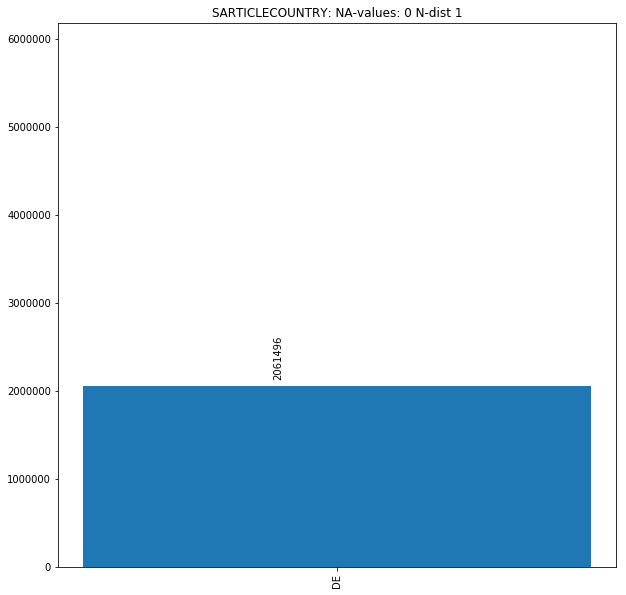

SARTICLENO  
Tells what ArticleNO this articlesizeNO belongs to 
(Only applicable for Inline Products) 
No hard linkage with Master data table
	No obvious errors visible, no indication of corrupted data
	Most popular article: AH2203 with 26149 orders (1,269 %)
	21157 distinct values


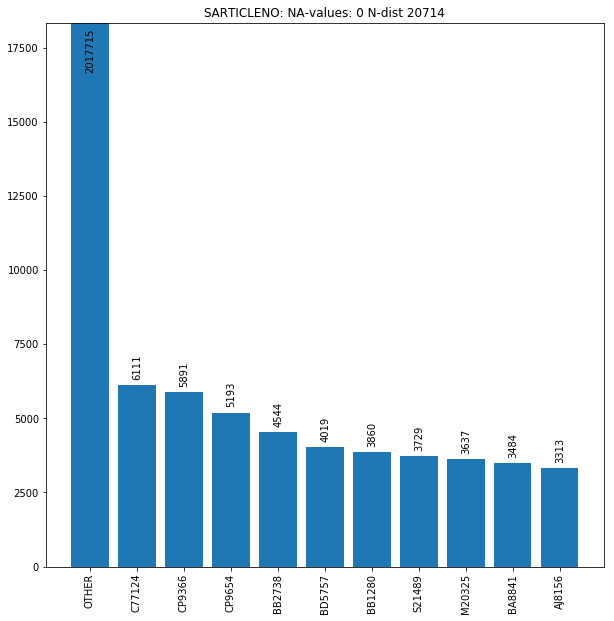

SMODELNO 
Tells from which ModelNo family this ArticleNO belongs to 
(coming for both Inline and Customized products)	
	At first sight, values seem probable/realistic
	Most popular model: AQO36 with 26149 orders (1,269 %)
	12566 distinct values


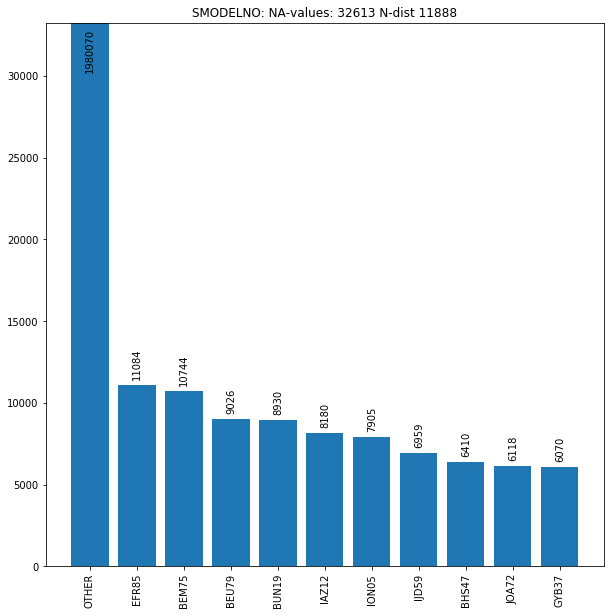

SORDERITEMTYPE 
Possible Values
ATCL- inline item (some places its called ACTL but it’s a data quality issue from source, still to be treated as Inline item)
CMAT- customized item
SHBI - stands for shipping line item (Please note for BR all items come as SHBI)
	Mostly ATCL (makes sense), few CMAT


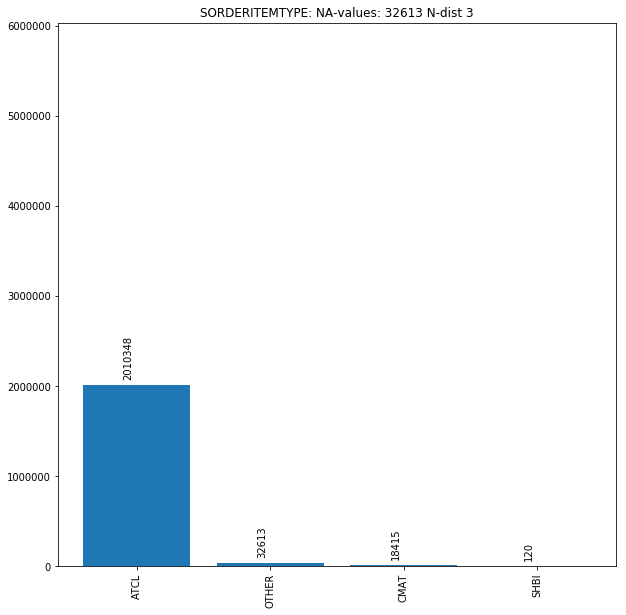

SORDERNO 
= Order number for which this Item belongs to	
	Seems to be fine
	orderno with highest number of products ordered included 65 different articles


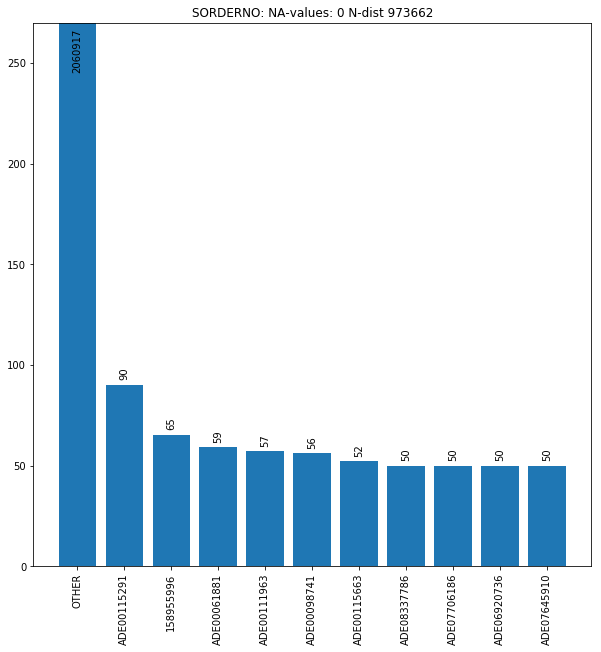

SSTATUS 
	Status of this orderitem 
Open - if status at least one quantity of item is unknown
Cancelled- if all quantity of item were cancelled
Returned-if all quantity of item were returned
Closed- if status of all quantity of this item is known (if all quantity were cancelled or returned then this does not apply)
	60 % of orders are closed
	35,6% are returned
	4% are cancelled
	0,1 % are open --> check if newest orders, should be excluded?


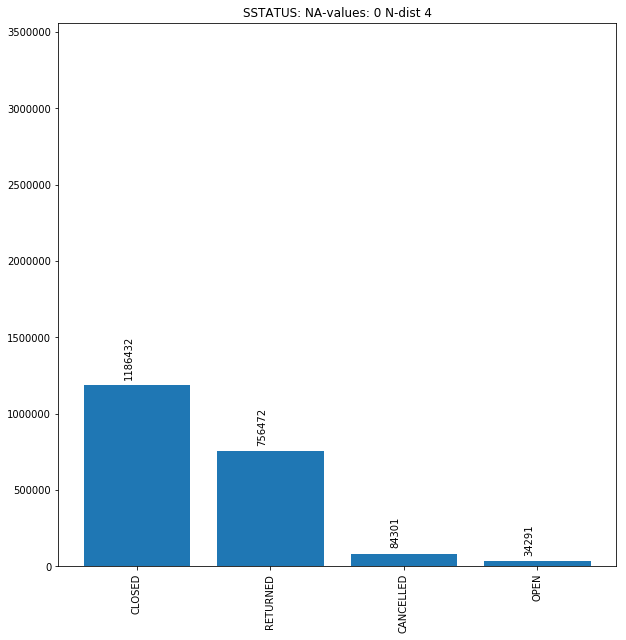

TSCREATED 
Technical Key - no significance for business
	Is only tracked once in half an hour therefore values seem realistic


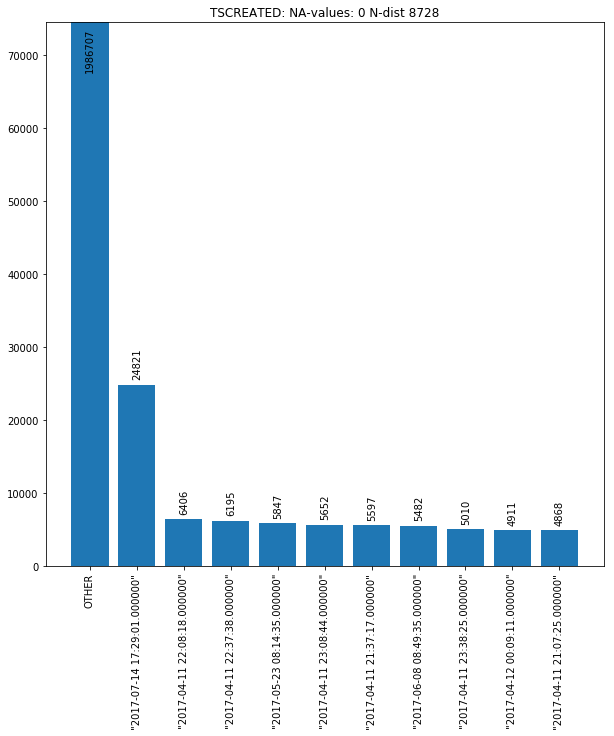

SPROMOTIONDESCRIPTION 
Retired,Merged to ADIVOUCHERPROMOTION table
FROM ADIVOUCHERPROMOTION: Promotion description,It is populated for all ECOMM as well as for US retail orders.
	Biggest promotion: SALE-MARKDOWN-TEMP, not-empty for 602203 orders (29,2%)


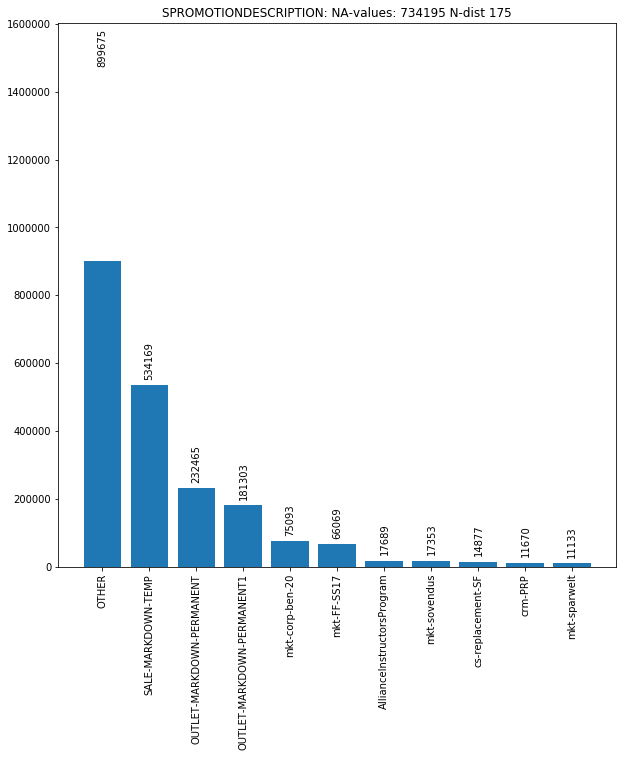

In [35]:
for col in cat_cols[:8]:
    print col, description_dict[col]
    plot_descriptive(col)

TSDELIVERYDATE 
The date when the order was shipped from Warehouse.
This is not the date when order is actually delivered to the customer.	
		Most orders on 9.10.2017: 2,9% (60237) 6 times average of about 11000 orders per day


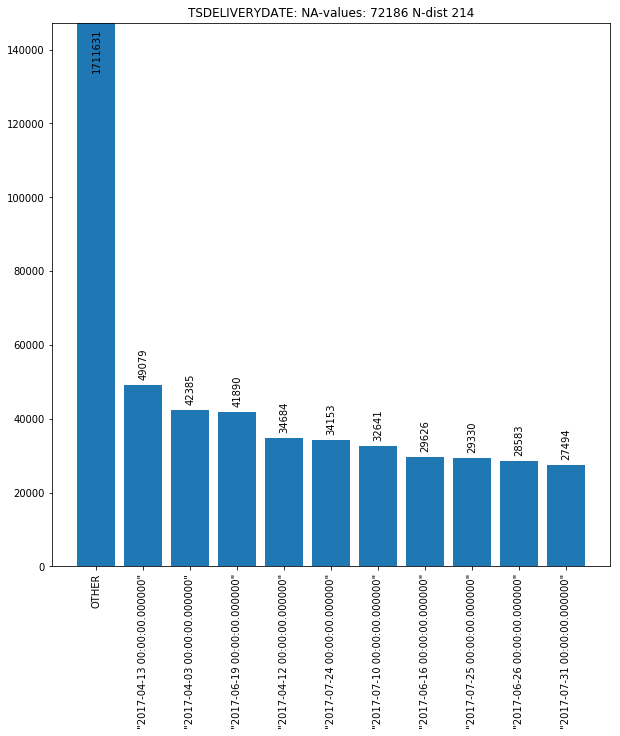

TSRETURNDATE 
latest Date when this item was returned (Please note in case of multiple returns of quantities for same item,
this will have latest date)
		Values seem realistic
		Most return on 8.1.2018: 13075 (Seems probable after Christmas)


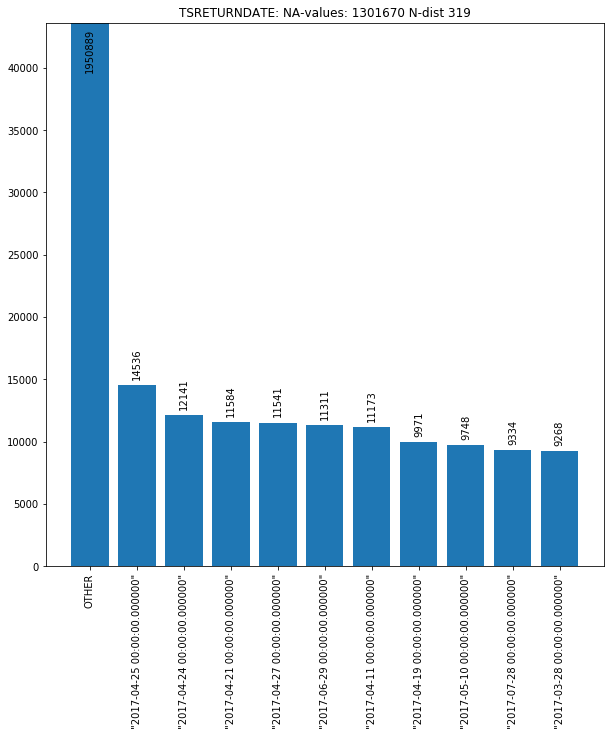

TSSHIPPINGDATE 
Not in Use. --> seems to have same values as TSDELIVERYDATE


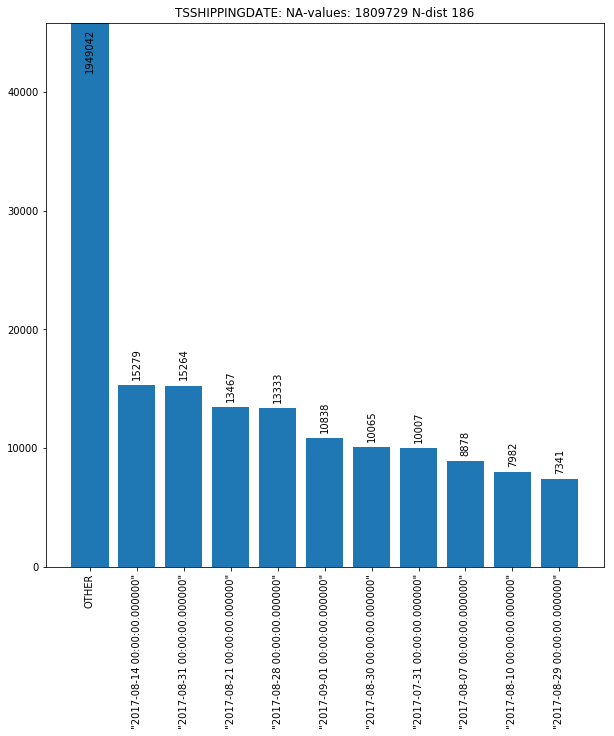

SVOUCHERCODE 
Retired,Merged to ADIVOUCHERPROMOTION table
	Many NA (as expected) 
	Most frequent vochercode: cyber30: applied to 166000 orders (8%)


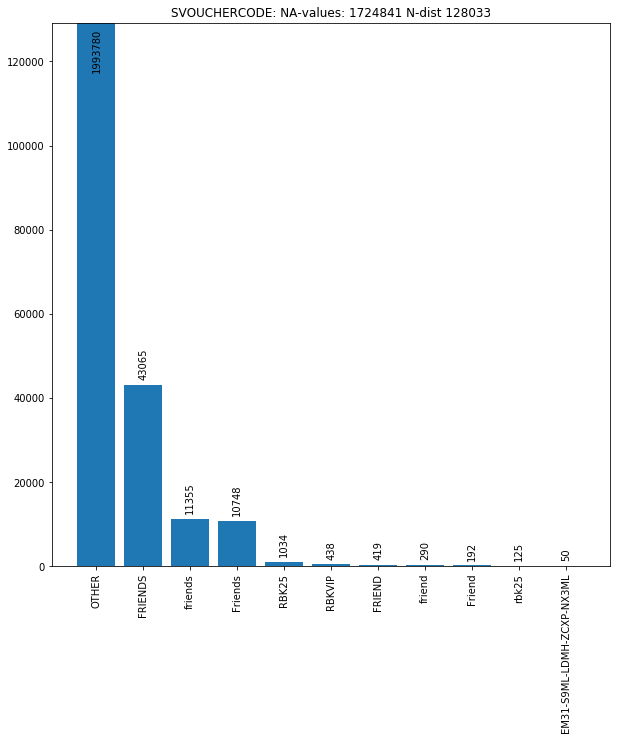

SPROMOTIONID 
	Filled for 1,46 MM orders --> quite many
	Most frequent: 551723: onsite-markdown-sale


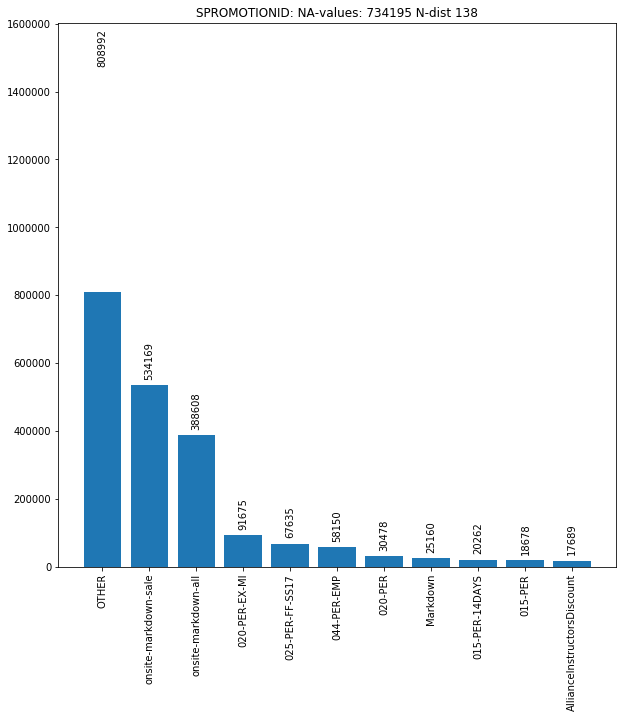

SPROMOTIONNAME 
Promotion name,It is populated for all ecom orders except for US
--> Problem with graph 


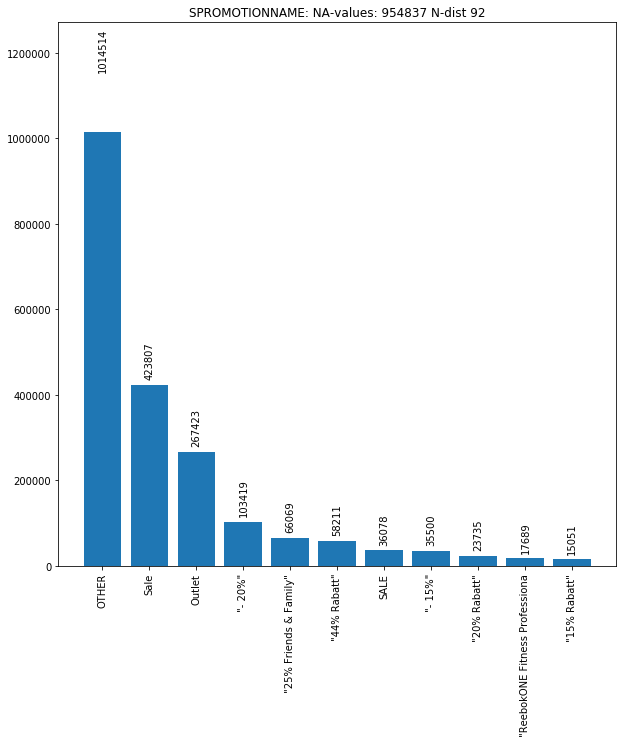

SCUSTPRODUCTCONFIGURL 
URL has only distinct values


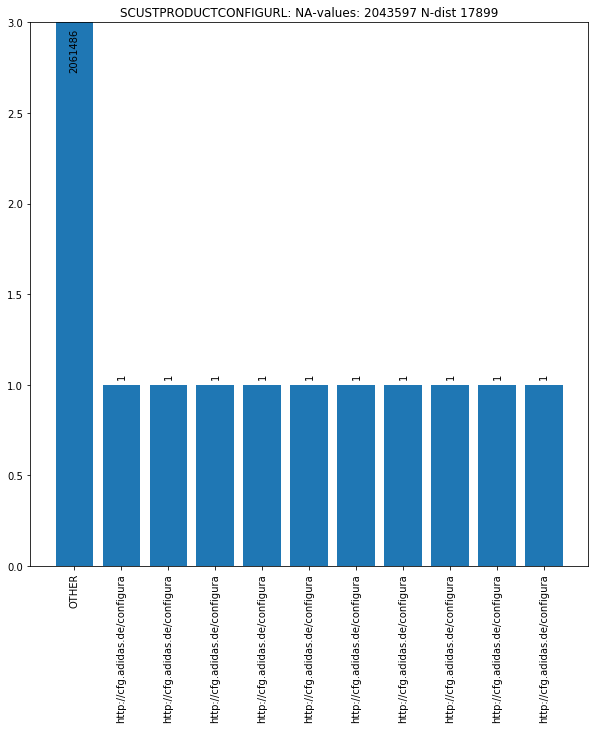

SCUSTPRODUCTIMAGEURL 
URL has only distinct values


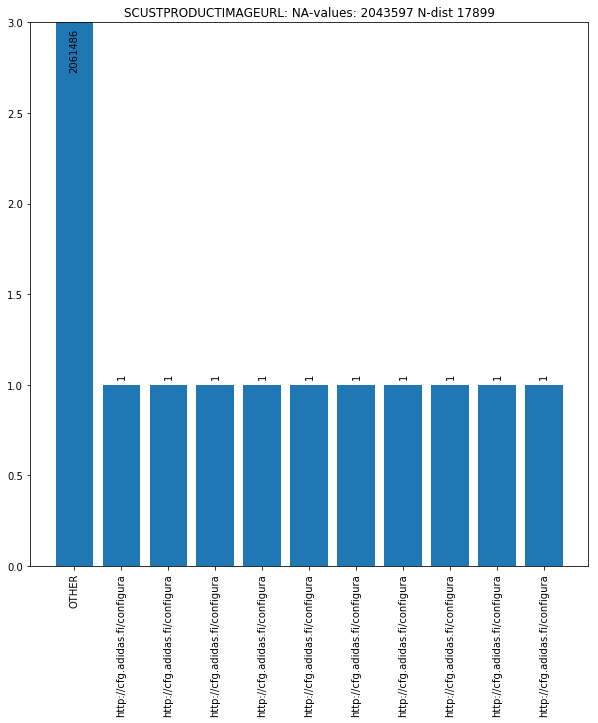

In [36]:
#import sys
#reload(sys)
#sys.setdefaultencoding('UTF8')
for col in cat_cols[8:16]:
    print col, description_dict[col]
    try:
        plot_descriptive(col)
    except UnicodeDecodeError:
        print "!!!! WARINING: Col ", col, "did not work"
        continue

SCUSTPRODUCTSIZETYPE 
 "When a customer buys a miadidas(customized) product, then, certain emails
 are sent to them.  So, in such an email, there is a delivery block in which 
 ""customized product size type"" e.g. FR needs to be displayed.  So this field stores the value for product size type and this field is parsed from in STAGE_ORDERLINEITEM.recipejson  
 Field should be null in case: 1.sorderitemtype <> 'CMAT'
 and 2.JSON is empty or the values do not exist 
 3.If order is not Adidas order"
 
 --> check if only filled for myadidas products
	Mostly NA, Mode: FR for 15773 orders  


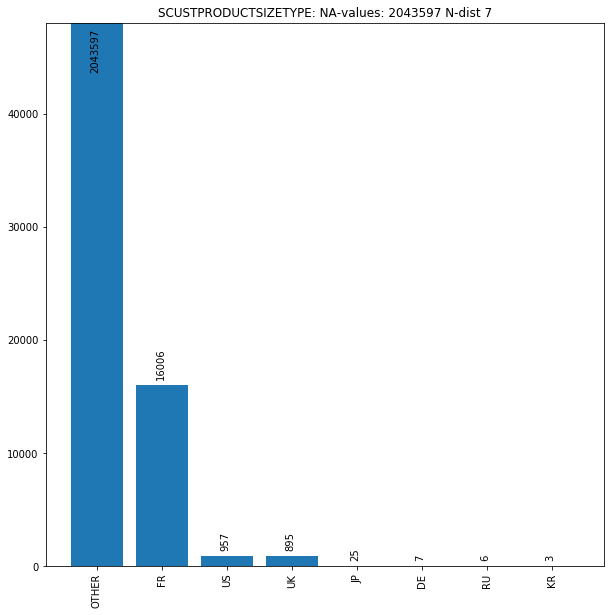

SCUSTPRODUCTSIZEVALUE 
 "When a customer buys a miadidas(customized) product, then, certain emails
 are sent to them.  So, in such an email, there is a delivery block in 
 which ""customized product size value"" e.g. 11 2/3 needs to be displayed.
 So this field stores the value for product size type and this field is 
 parsed from in STAGE_ORDERLINEITEM.recipejson.  

 Field should be null in case:
1.sorderitemtype <> 'CMAT' and
2.JSON is empty or the values do not exist
3.If order is not Adidas order"
	Same number of NA's as 16 which is sensible
	Shoe sizes


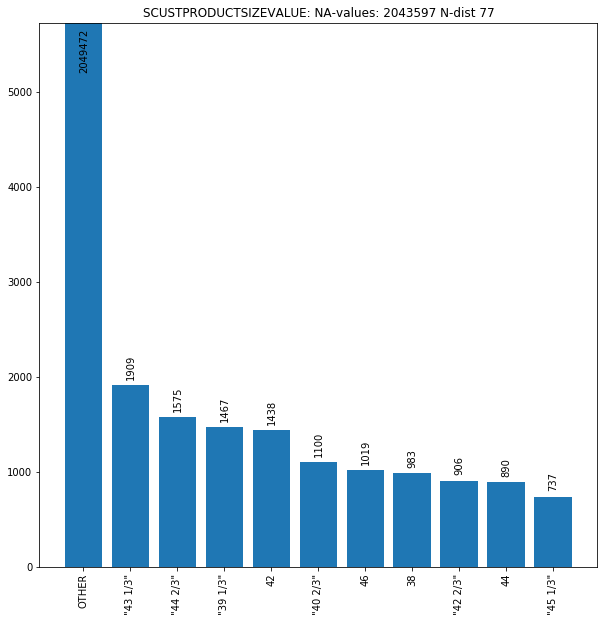

SDISPLAYSIZE 
Local size of this item purchased - like L, S or 48 etc
		NA for 25500
		seems fine


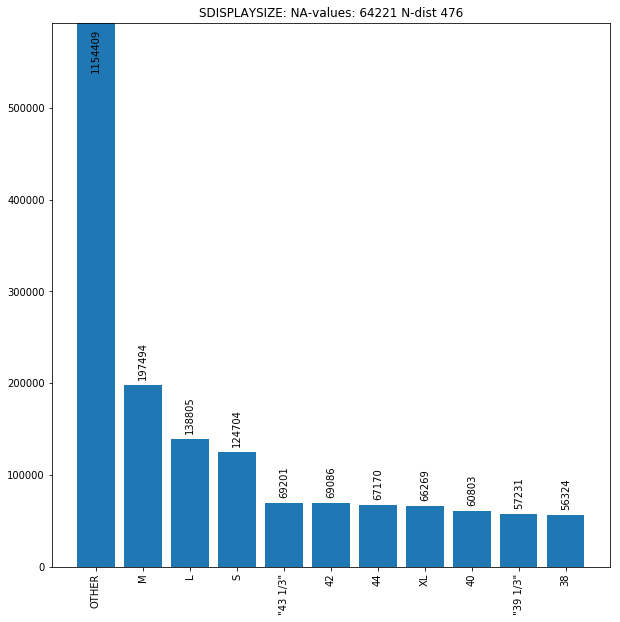

SGIFT 
True if it’s a gift else false
	100% False --> Variable not really useful for analysis


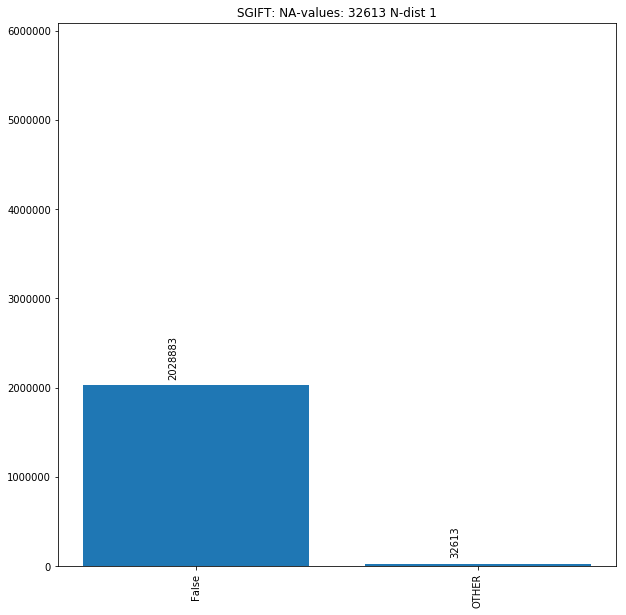

SLINEITEMTEXT 
Description of the item listed on website when item was purchased
	No NA values
	Most frequent: YEEZY BOOST 350 V2: 44511 orders


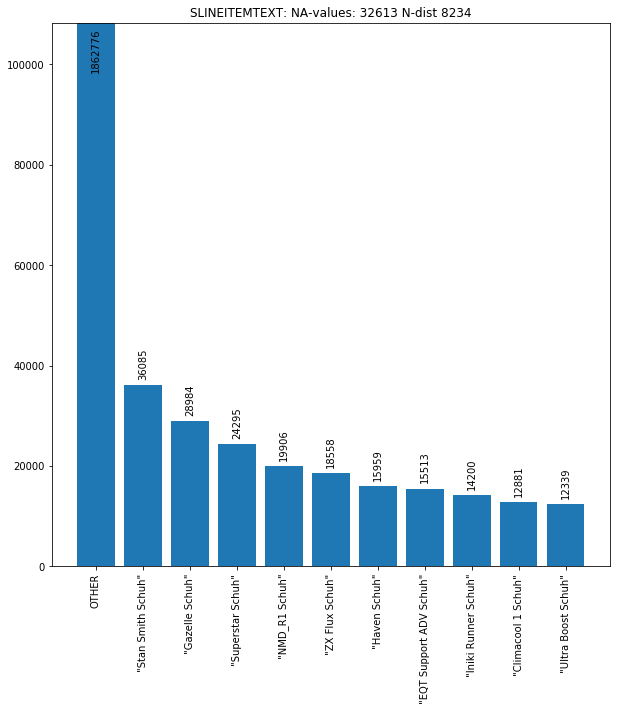

SPALINEITEMTEXT 
Text of discount applied on the item
	NA for 1041125 orders --> only for discounted orders?
	Most frequent: Sale


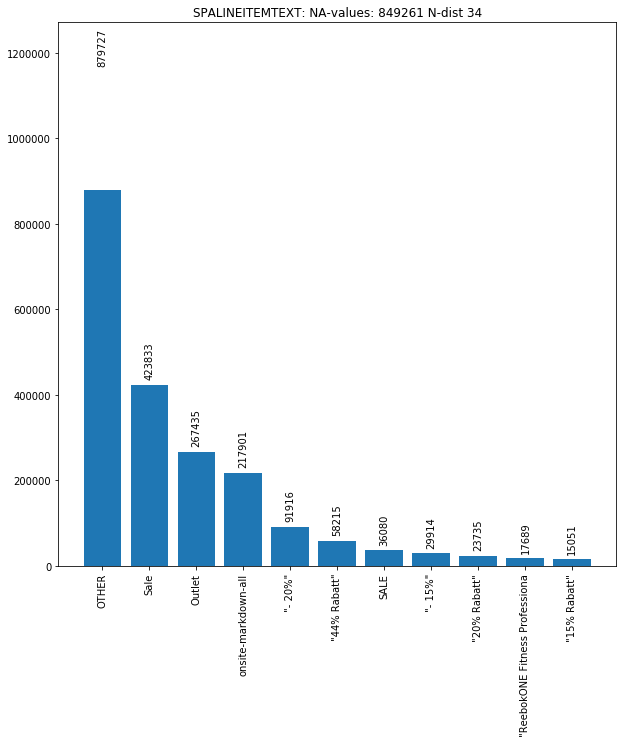

SPAYMENTSTATUS 
This stores 'YES' or 'NO' representing the status of the payment for the training
		NA: 121660
		Filled with Paid (most orders) vs. Other


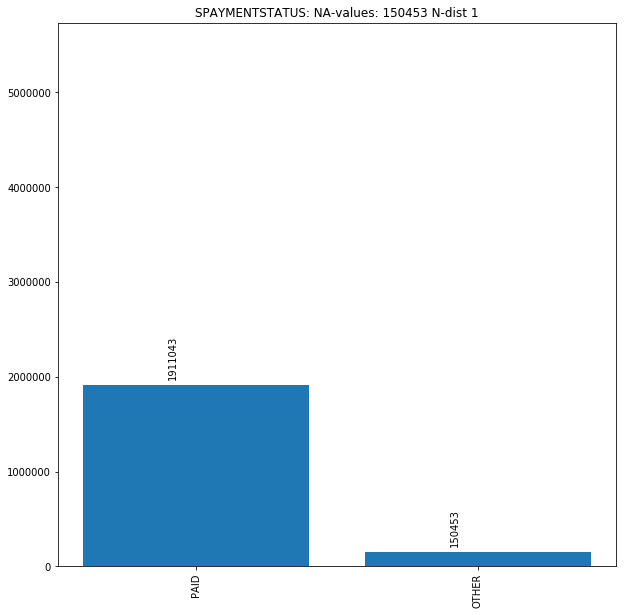

SPRODUCTNAME 
Name of product shown to the customer for this item on website
	Only 629 NA
	Could be equivalent to SLINEITEMTEXT but less NA


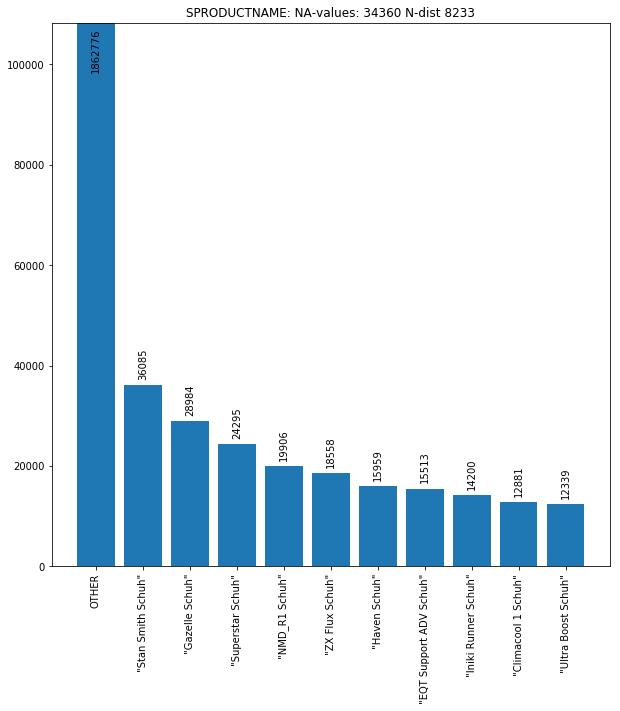

In [37]:
for col in cat_cols[16:24]:
    print col, description_dict[col]
    plot_descriptive(col)

IARTICLEISONLINE 
Flag indicating if article is available on ecomm site
	NA: 5725
	Mode: N (Can that be right?)


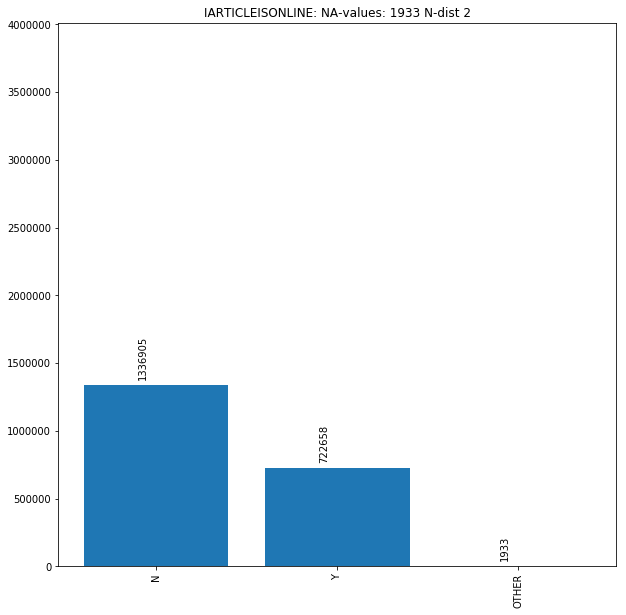

SARTICLENAME 
The article description contains the name of an article used to describe 
and identify the product to costumers. The description is often based on 
the parent model's description also adding the article's main color(s). 
Further on it may include some of the following elements as well: purpose 
(sports category, gender, age group), form (product type, silhouette), 
presentation (graphics), royalty information (club, league) and benefits 
(technology/marketing concept). Due the limited size of the description, 
those elements might be abbreviated.
	No NA,
	Not equal to SPRODUCTNAME
	distinct values: 9741, less than SMODELNO AND SARTICLENO


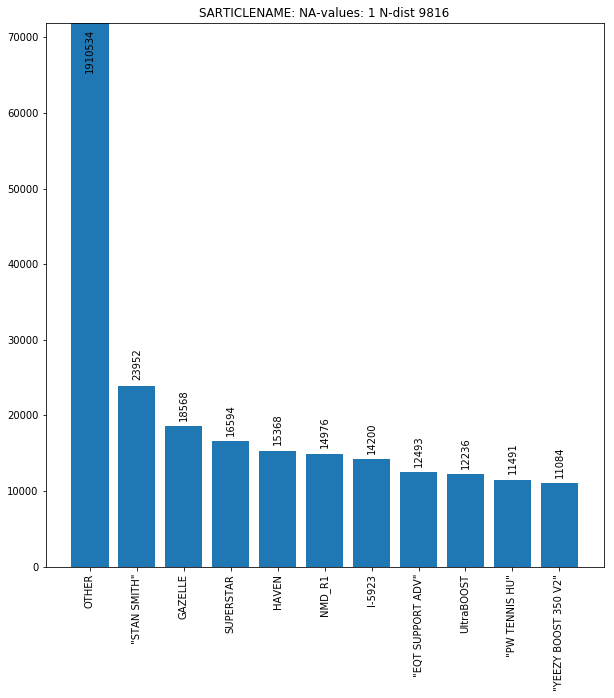

SCOLORWAYLONGDESC 
Article color combination long description
	NA: 253
	If used, feature needs to be cleaned (colors written in different ways: capital letters etc..)


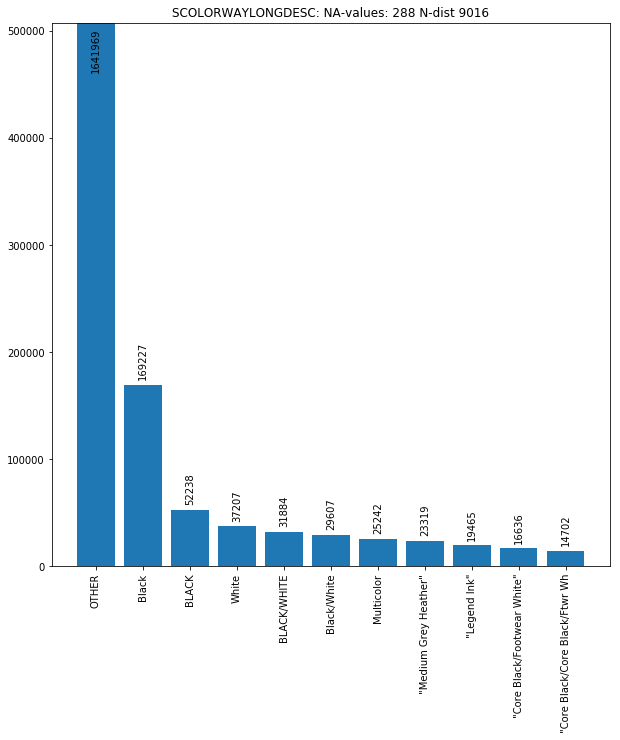

SCOLORWAYSHORTDESC 	
Article color combination SHORT description
	NA: 253
	If used, feature needs to be cleaned (colors written in different ways: capital letters etc..)


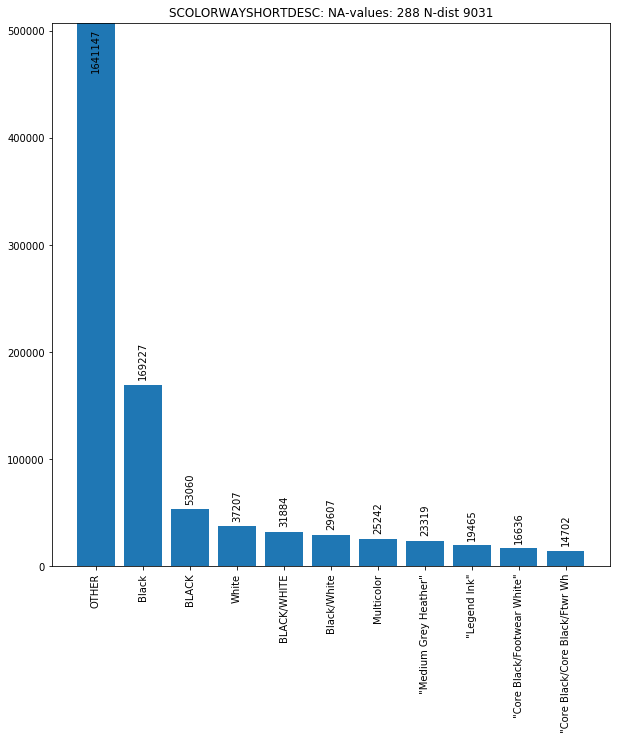

SGENDERID 
Intended audience gender
	No NA,
	Values M, F or U


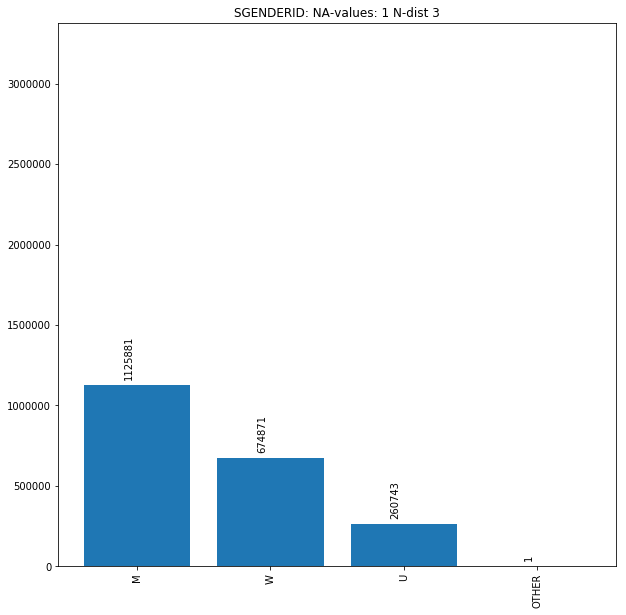

SSHOPNO 
Text description of eComm site shop (currently only adidas)
	NA: 5725
	Values: adidas or rebook


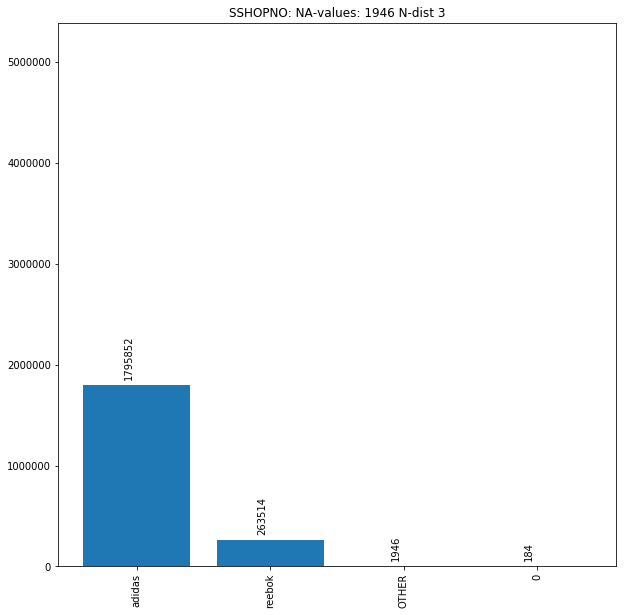

TSLASTMODIFIED 
Internal field
	no NA


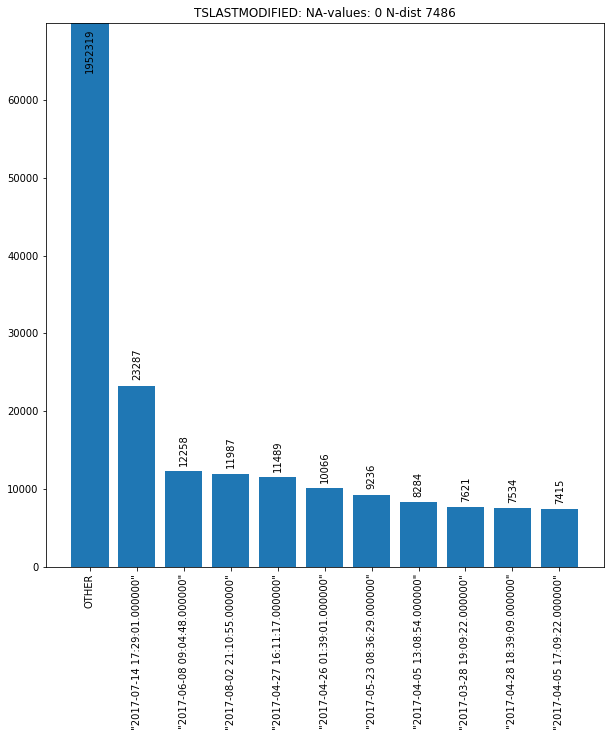

SAGEGROUP 
The Age Group is a classification of our products
to best fit for a consumer’s age.
	NA: 1134
	distinct values: 4 (A, J, K, I) adult, joung, kid, infant


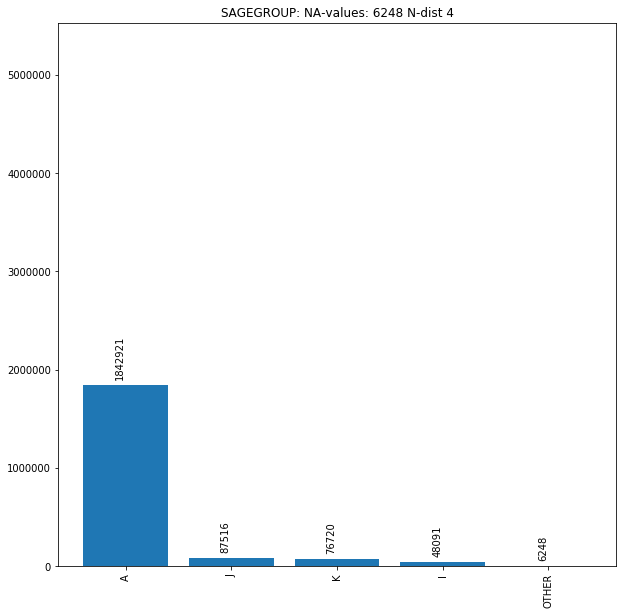

In [38]:
for col in cat_cols[24:32]:
    print col, description_dict[col]
    plot_descriptive(col)

SARTICLELIFECYCLEDATE 
Date the Lifecycle Status was updated for the last time
	--> DOES NOT REALLY SEEM RELEVANT
	NA: 1134
	distinct: 761
	DATE-FORMAT


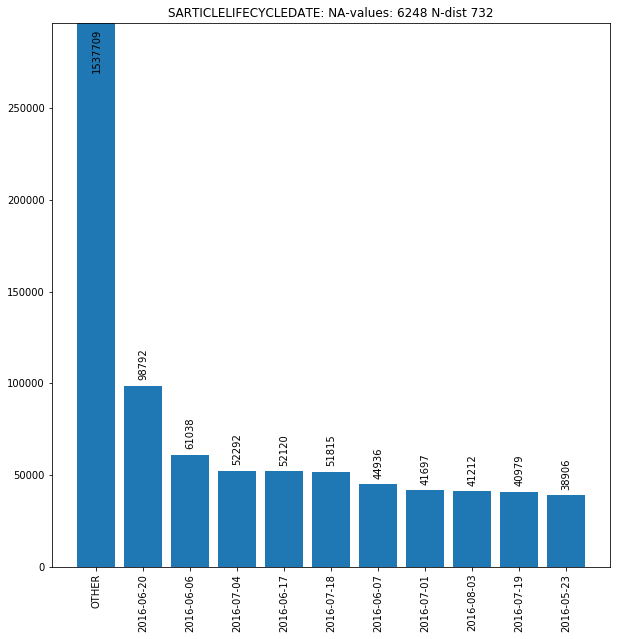

SDEVELOPMENTORGANIZATION 
The Development Organization represents the Organizational Unit which is
 responsible for the development of a product. It can be a global 
 development center as well as local development teams in subsidiaries.
	NA: 1134
	dist: 12
	values do not speak for themselves


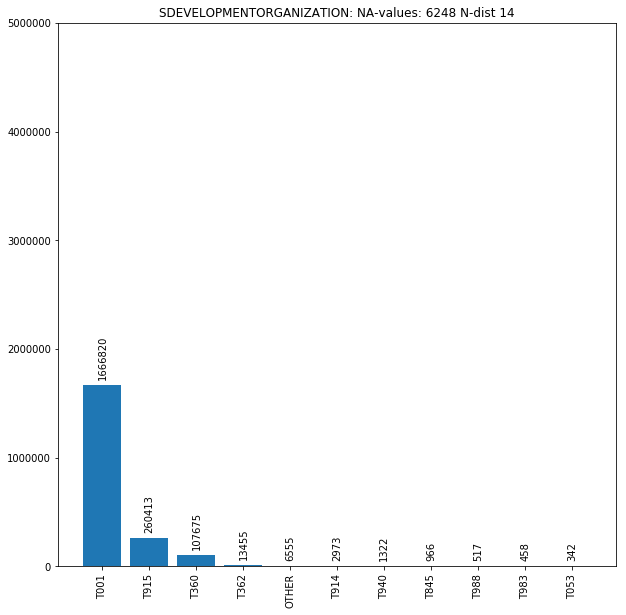

SPRODUCTCATEGORY 
 


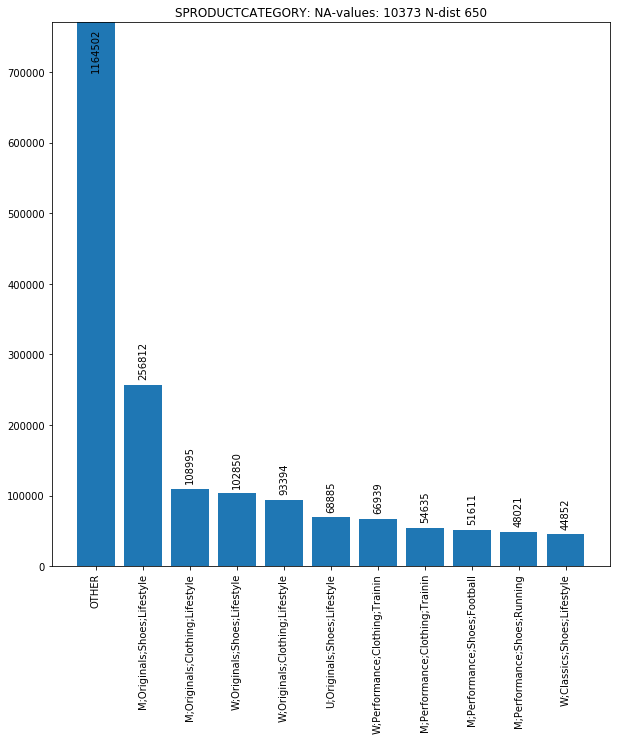

SPRODUCTTYPE 
 


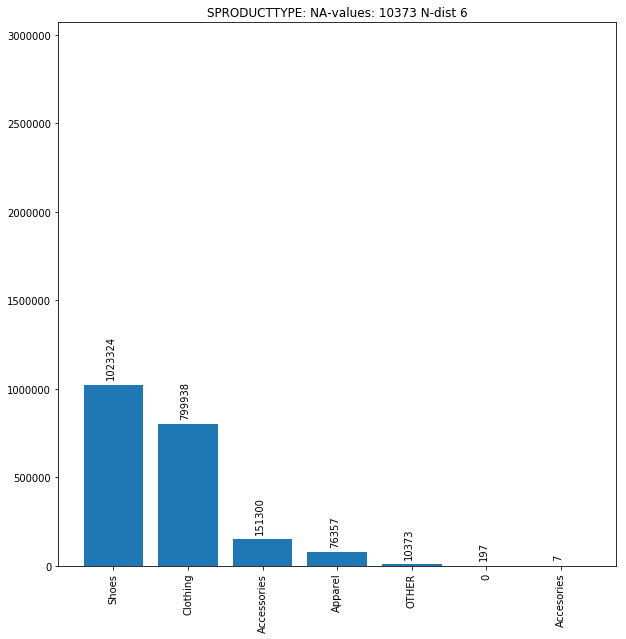

SSPORTSCATEGORY 
 


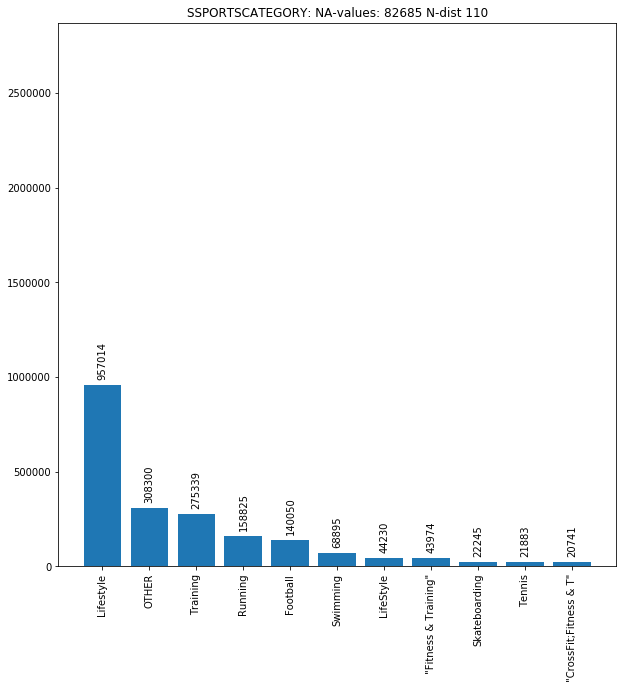

SARTICLELIFECYLE 
The Product Lifecycle Status classifies the milestones a model and article
passes from its intial development to its final termination. This can be
considered the "overarching" lifecycle indicating the maturity of a product.
As for human beings you can't turn younger so this lifecycle will only 
allow to "evolve" but never go back to an earlier lifecycle state.
	Attention: 1134 nan! But no NA
	By far most frequent value: 50
	--> might not be useful because little variation


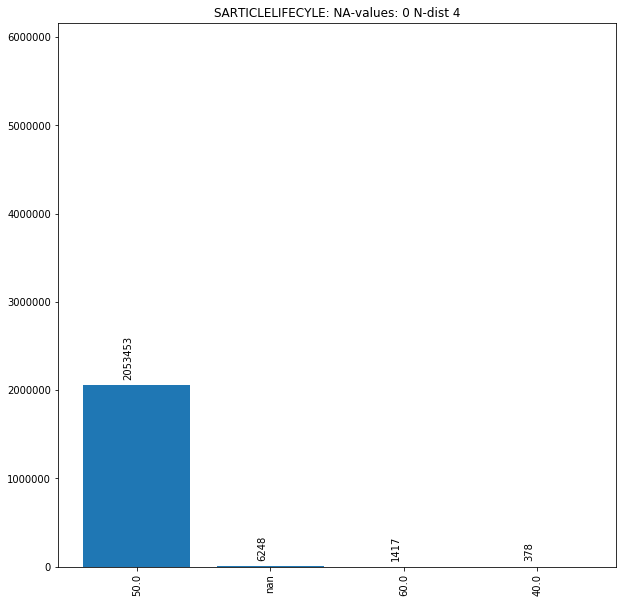

SARTICLETYPE 
The Article Type classifies each article whether it is regular bulk article or
of an extraordinary nature. Extraordinary article types require special 
rules and processes to manage and control them.
	No NA, but again 1134 nan
	distinct values: 5
	By far most frequent value: 1.0
	--> might not be useful because little variation


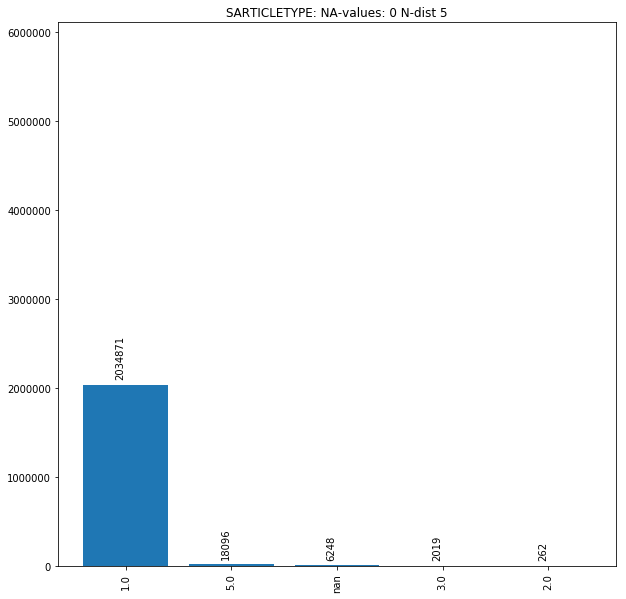

SBUSINESSSEGMENT 
Business Segments are the basis of a common product hierarchy. 
Business Segment hierarchy gives an external view how the products 
are organized within adidas Group.
	No NA
	ditinct values 96
	numeric values, do not make immediate sense


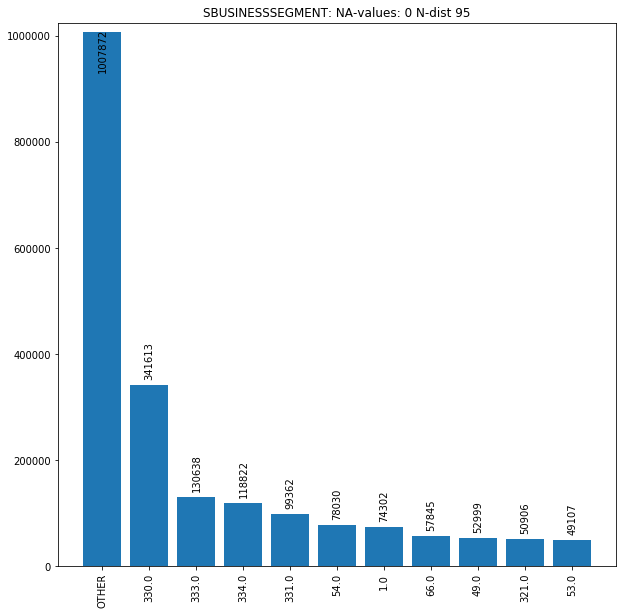

In [39]:
for col in cat_cols[32:40]:
    print col, description_dict[col]
    plot_descriptive(col)

SBUSINESSUNIT 
A Business Unit is an organizational unit, managed by a BU Manager (BUMs).
It is responsible to develop the business in a certain category/segment 
and has Profit and Loss responsibilty. A Business Unit manages one or more
Product Lines.
Together with Product, Category, Communication and Promotion Managers, 
they oversee all marketing and product creation activities in their 
Business Unit (including product design, ranging, forecasting, pricing,
catalogue concepts, market research, events and promotion planning). 
	No NA,
	distinct values: 34
	no immediate relevance


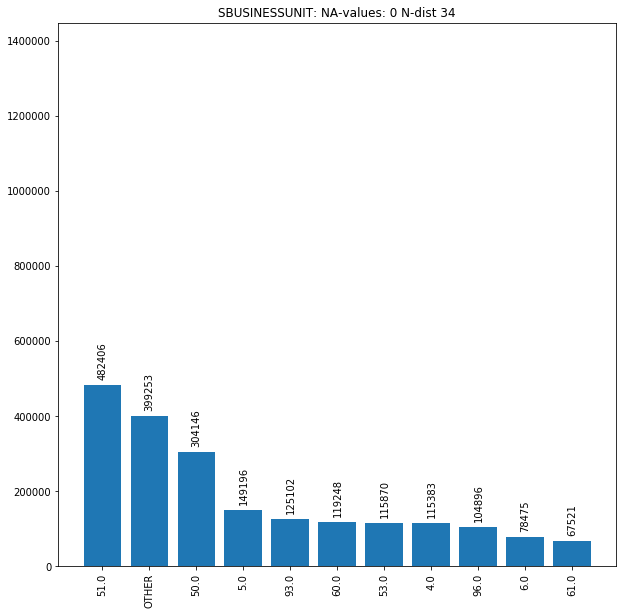

SDEVELOPMENTLOCATION 
The Development Location represents the geographical location where the 
product was developed.
	No NA but again 1134 nan
	values do not make immediate sense
	distinct values: 17


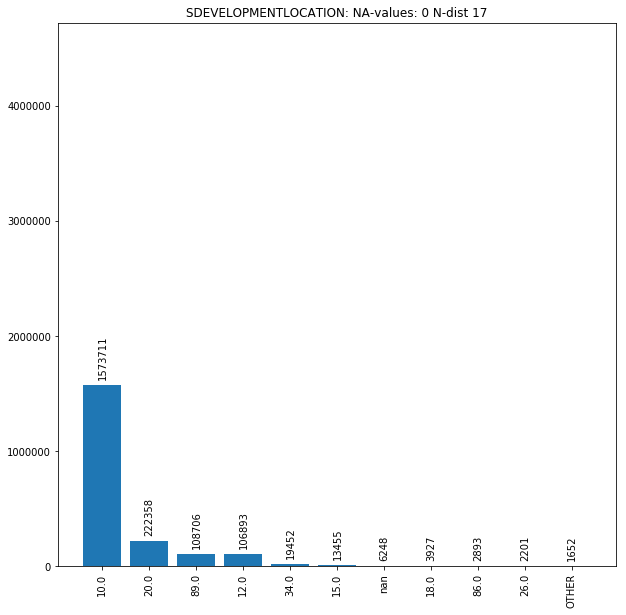

SDISTRIBUTIONCHANNEL 
Describes the customer segment to which we sell a certain range of products,
e.g. sports specialist, mail order, fashion, etc.
Distribution Channels are defined by the Global Wholesales organization.
	NA: 895924 (nan)
	Because of many nan does not seem valuable


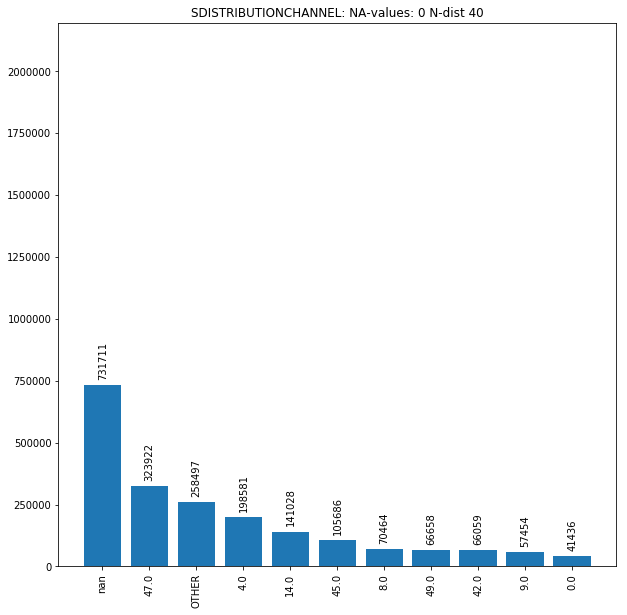

SKEYCATEGORY 
The Key Category is the strategic long-term positioning for a brand and/or 
sub-brand. It is a consolidated view on the Business Segments that are 
combined into major business groups.	
	No NA
	distinct: 30
	MODE: 9.0 
	values do not make immediate sense


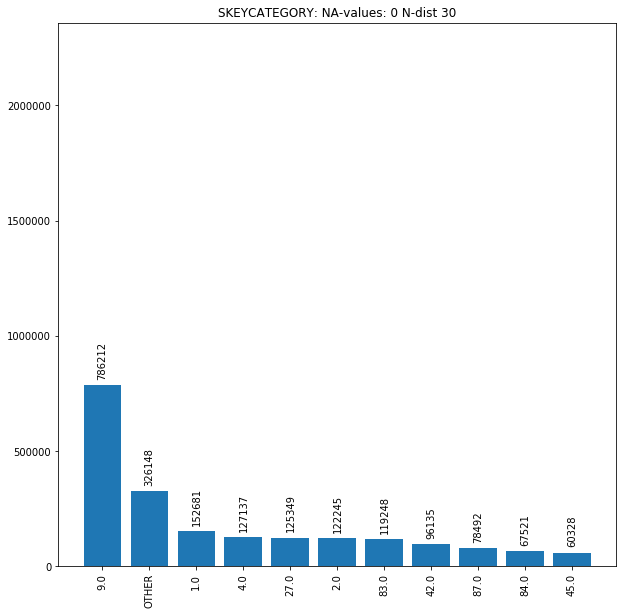

SMANAGEMENTBRAND 
Management Brand represents a responsibility based groupings of Product
Brands. Under the Management Brand there can be several Brand logos that 
are defined to be under one management responsibility. Management Brand is 
used by Finance community for actuals, budget and forecast reporting.
 The maintenance is triggered by Controlling and has to be approved by GP&R.
 The maintenance of reference data is done by GDM OPS in Kalido and by FSS 
 in GRAPE. The Management Brand is assigned to model based on a mapping 
 table in SPM. The mapping table is maintained by SPM IT. The Code can be 
 up to 2 digits and the Description up to 40 digits long.
	No NA, but 1134 nan
	distinct: 4 (11, 26, 42)
	values do not interpretable without background knowledge


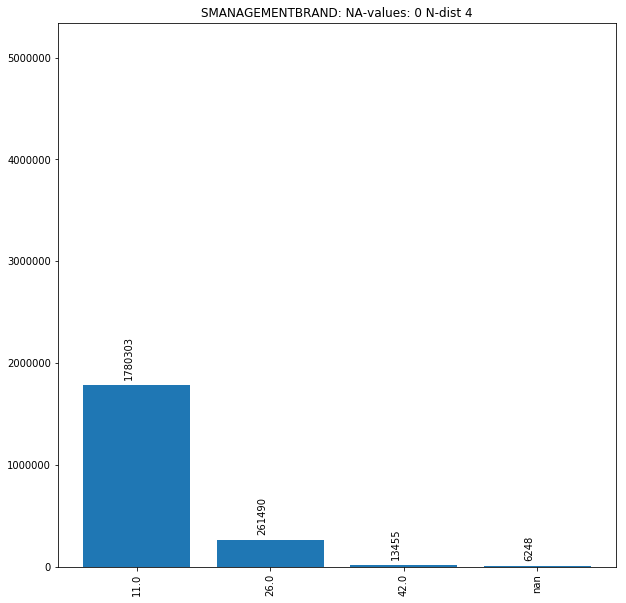

SORDERLINEITEMNO 
Line number related to the order header (1,2,3…)
Business key of this table
		No NA
		distinct values: 50
		Mode: 1 (most customers only purchased one product within one order)


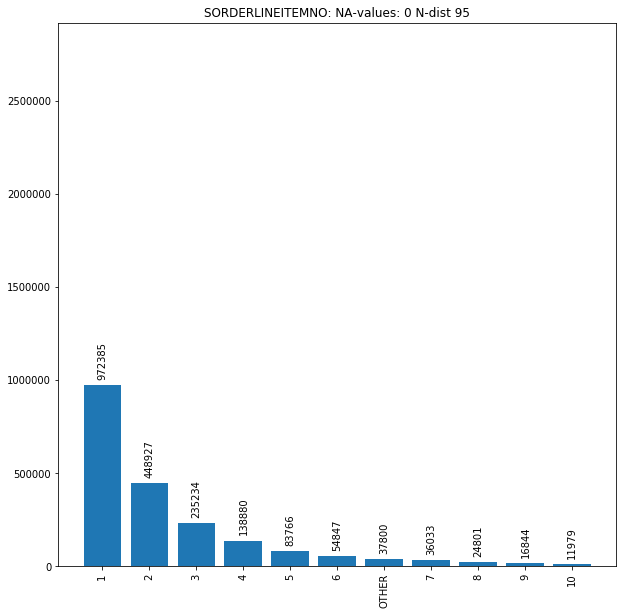

SORDERPRODUCTTYPE 
Not in Documentation!
	Mostly NA,
	contains CMAT but only 14 obs, miadidas: 3381


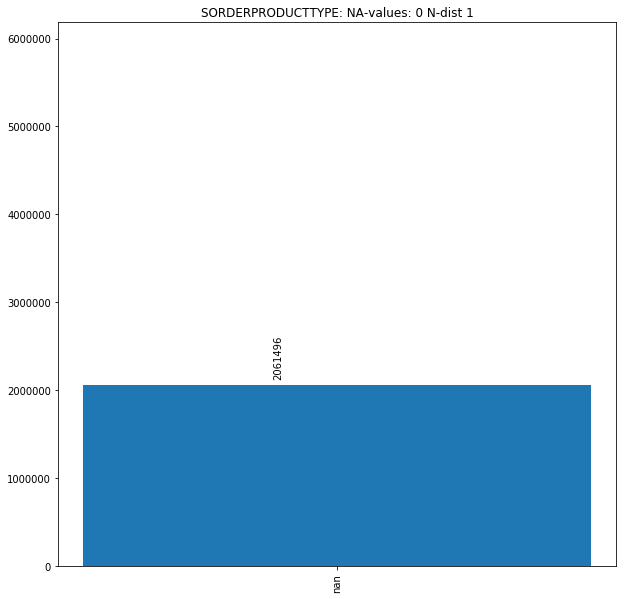

SPRODUCTLINE 	
A Product Line is an organizational level within the Marketing Hierarchy.
Basically, it is a grouping of all the products that a Product Manager 
is in charge for.	
	No NA
	distinct values: 198
	values not interpretable, might be important for joins in order to recommend products of the same product line


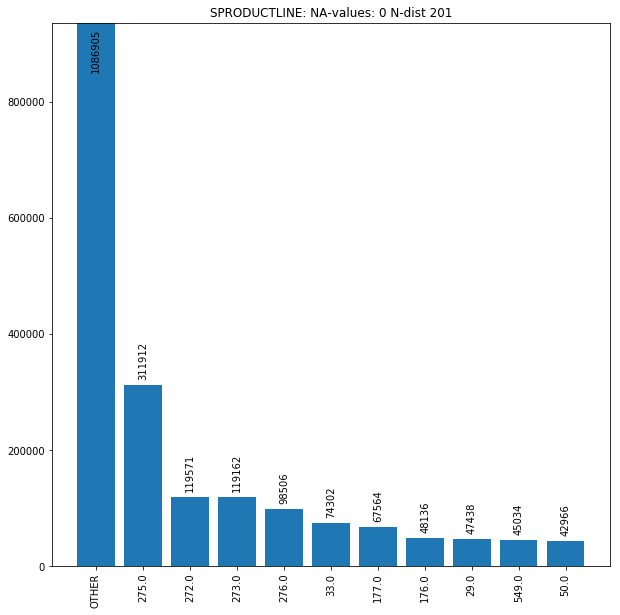

In [40]:
for col in cat_cols[40:48]:
    try:
        print col, description_dict[col]
    except:
        print col, "key error!!!!"
    plot_descriptive(col)

SPRODUCT_TITLE_FAMILY 
Not populated
	nan for most obs, 0.0 for rest


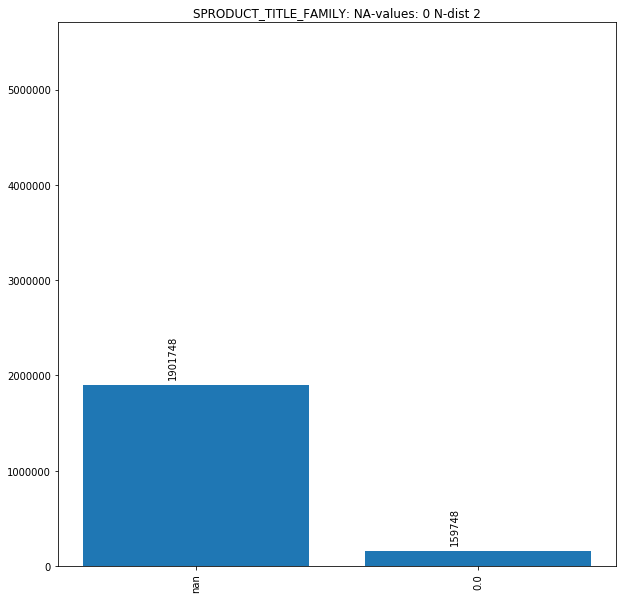

SPRODUCT_TITLE_PREPEND 
Not populated
	nan for most obs, 0.0 for rest
	




 
	


	


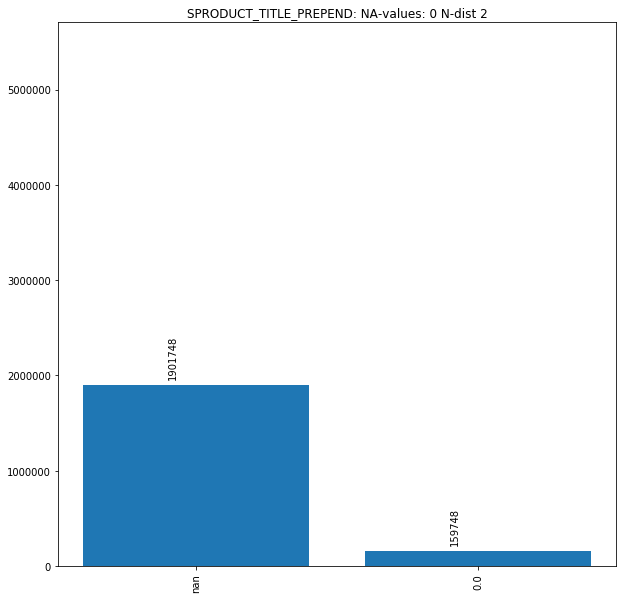

In [41]:
for col in cat_cols[48:]:
    print col, description_dict[col]
    try:
        plot_descriptive(col)
    except KeyError:
        continue

In [42]:
cat_cols_to_drop = """SPRODUCT_TITLE_PREPEND
SPRODUCT_TITLE_FAMILY
SARTICLELIFECYLE
TSLASTMODIFIED
SCOLORWAYLONGDESC
SPAYMENTSTATUS
SGIFT
SCUSTPRODUCTSIZEVALUE
SCUSTPRODUCTSIZETYPE
SCUSTPRODUCTIMAGEURL
SCUSTPRODUCTCONFIGURL
SPROMOTIONID
TSSHIPPINGDATE 
TSDELIVERYDATE
TSRETURNDATE
SPROMOTIONDESCRIPTION""".split("\n")
cat_cols_to_drop = [c.strip() for c in cat_cols_to_drop]

In [43]:
for c in cat_cols_to_drop:
    del df_sel[c]

In [44]:
df_sel.shape

(2061496, 63)

### Add some features to the dataframe
* is voucher-available
* is a promotion available
* is personalization available
* how old is the article based on SARTICLELIFECYCLEDATE 


In [45]:
df_sel["VOUCHERAVAILABLE"] = ~df_sel["SVOUCHERCODE"].isna()
df_sel["PROMOTIONAVAILABLE"] = ~df_sel["SPROMOTIONNAME"].isna()
df_sel["PERSONALISATIONAVAILABLE"] = df_sel["SORDERITEMTYPE"] == "CMAT"
df_sel["ARTICLEAGE"] = (pd.Series([datetime.now()] * len(df_sel)) - pd.to_datetime(df_sel["SARTICLELIFECYCLEDATE"])).map(lambda x: x.days)



In [46]:
print "voucher available: ", df_sel["VOUCHERAVAILABLE"].value_counts(), "\n"
print "promotion available: ", df_sel["PROMOTIONAVAILABLE"].value_counts(), "\n"
print "personalisation available: ", df_sel["PERSONALISATIONAVAILABLE"].value_counts()


voucher available:  False    1724841
True      336655
Name: VOUCHERAVAILABLE, dtype: int64 

promotion available:  True     1106659
False     954837
Name: PROMOTIONAVAILABLE, dtype: int64 

personalisation available:  False    2043081
True       18415
Name: PERSONALISATIONAVAILABLE, dtype: int64


### check yeezy boost was often cancelled or returned
It seems strange that the yeezy boost is sold so often. Let's see if there is anything strange in the data

In [47]:
print "all cancelled", df_sel[df_sel["SARTICLENAME"] != '"YEEZY BOOST 350 V2"']["IQUANTITYCANCELLED"].mean()
print "all returned", df_sel[df_sel["SARTICLENAME"] != '"YEEZY BOOST 350 V2"']["IQUANTITYRETURNED"].mean()
print "all paid", df_sel[df_sel["SARTICLENAME"] != '"YEEZY BOOST 350 V2"']["IQUANTITYPAID"].mean()

all cancelled 0.0425251120263
all returned 0.374175043845
all paid 0.941637583081


In [48]:
print "yeezy cancelled", df_sel[df_sel["SARTICLENAME"] == '"YEEZY BOOST 350 V2"']["IQUANTITYCANCELLED"].mean()
print "yeezy returned", df_sel[df_sel["SARTICLENAME"] == '"YEEZY BOOST 350 V2"']["IQUANTITYRETURNED"].mean()
print "yeezy paid", df_sel[df_sel["SARTICLENAME"] == '"YEEZY BOOST 350 V2"']["IQUANTITYPAID"].mean()

yeezy cancelled 0.0114579574161
yeezy returned 0.0101046553591
yeezy paid 0.988271382173


# Bestsellers

In [49]:
# get articlename-number mapping
# article_df = pd.read_csv(path_to_data + filename, delimiter=delimiter, usecols=["SARTICLENAME", "SARTICLENO"])
article_mapping = df_sel.groupby("SARTICLENO")["SARTICLENAME"].max().reset_index()

In [49]:
cnt_df = df_sel[["SARTICLENAME", "DGROSSVALUE"]].groupby("SARTICLENAME").count().reset_index()
cnt_df.columns = ["articlename", "count"]
cnt_df.sort_values("count", ascending=False).head(20)

,articlename,count
7175,"""STAN SMITH""",23952
9648,GAZELLE,18568
9754,SUPERSTAR,16594
9657,HAVEN,15368
9694,NMD_R1,14976
9670,I-5923,14200
2612,"""EQT SUPPORT ADV""",12493
9781,UltraBOOST,12236
5703,"""PW TENNIS HU""",11491
8996,"""YEEZY BOOST 350 V2""",11084


In [50]:
cnt_df = df_sel[["SPRODUCTNAME", "DGROSSVALUE"]].groupby("SPRODUCTNAME").count().reset_index()
cnt_df.columns = ["productname", "count"]
cnt_df.sort_values("count", ascending=False).head(20)

,productname,count
6104,"""Stan Smith Schuh""",36085
2777,"""Gazelle Schuh""",28984
6335,"""Superstar Schuh""",24295
3960,"""NMD_R1 Schuh""",19906
7697,"""ZX Flux Schuh""",18558
2969,"""Haven Schuh""",15959
2026,"""EQT Support ADV Schuh""",15513
3200,"""Iniki Runner Schuh""",14200
1232,"""Climacool 1 Schuh""",12881
7125,"""Ultra Boost Schuh""",12339


In [100]:
cnt_df = df_sel[["SPRODUCTCATEGORY", "DGROSSVALUE"]].groupby("SPRODUCTCATEGORY").count().reset_index()
cnt_df.columns = ["productcategory", "count"]
cnt_df.sort_values("count", ascending=False).head(20)

,productcategory,count
317,M;Originals;Shoes;Lifestyle,256812
311,M;Originals;Clothing;Lifestyle,108995
543,W;Originals;Shoes;Lifestyle,102850
539,W;Originals;Clothing;Lifestyle,93394
456,U;Originals;Shoes;Lifestyle,68885
578,W;Performance;Clothing;Training,66939
359,M;Performance;Clothing;Training,54635
368,M;Performance;Shoes;Football,51611
378,M;Performance;Shoes;Running,48021
530,W;Classics;Shoes;Lifestyle,44852


## Joint sales
Analyse which products are sold together often

In [51]:
# First filter for order with more than 2 items only
multiorder_numbers = df_sel.groupby("SORDERNO", as_index=False).count()[["SORDERNO", "dummy"]]
multiorder_numbers.columns = ["SORDERNO", "n_items"]
multiorder_numbers = multiorder_numbers[multiorder_numbers["n_items"] >= 2]
multiorder = df_sel.merge(multiorder_numbers, on="SORDERNO", how="inner")  #, rsuffix="_m"

In [52]:
print multiorder.shape, df_sel.shape

(1536658, 68) (2061496, 67)


In [53]:
multiorder.sort_values("SORDERNO").head(20)[
    ["SORDERNO", "SARTICLENO", "SMODELNO", "SSTATUS", "IQUANTITYDELIVERED", "IQUANTITYORDERED", "IQUANTITYRETURNED", "SDISPLAYSIZE"]]

,SORDERNO,SARTICLENO,SMODELNO,SSTATUS,IQUANTITYDELIVERED,IQUANTITYORDERED,IQUANTITYRETURNED,SDISPLAYSIZE
735038,-1886631935,AJ3096,BCY18,CLOSED,1,1,0,M
735037,-1886631935,BK3344,MKK46,RETURNED,1,1,1,M
735036,-1886631935,BS3977,DJS74,RETURNED,1,1,1,M
735039,-1886631935,CF8912,DTA47,RETURNED,1,1,1,M
1103905,-1887983435,BA8841,IJD59,RETURNED,1,1,1,"""45 1/3"""
1103904,-1887983435,BY2549,CDB29,CLOSED,1,1,0,"""45 1/3"""
1103903,-1887983435,S80768,CCX02,RETURNED,1,1,1,"""45 1/3"""
96017,-1893005256,S75076,GWD46,CANCELLED,0,1,0,"""39 1/3"""
96018,-1893005256,BZ0470,BEG18,CANCELLED,0,1,0,"""44 2/3"""
96016,-1893005256,CP9701,BEG18,CANCELLED,0,1,0,"""44 2/3"""


In [57]:
multiorder["SPRODUCTCATEGORY"] = multiorder["SPRODUCTCATEGORY"].map(lambda x: "".join([letter for letter in str(x).lower() if letter != '"']))

In [135]:
class AnalyseJointSales(object):
    
    def __init__(self, multiorderdf, category_column_name, keep_same=False):
        self.modf = multiorderdf.dropna(axis=0, subset=[category_column_name])
        self.c_col_name = category_column_name
        self.cat_set = None
        self.co_ordered = None
        self.keep_same = keep_same
        
    @staticmethod
    def _remove_el_from_set(cat, catset):
        """
        cat: categorylabel that should be removed from the set
        catset: set: 
        """
        return tuple([x for x in catset if x != cat])  # somehow set.difference does not work
    
    @staticmethod
    def _remove_el_from_list_once(cat, catlist):
        list_to_return = []
        for idx, el in enumerate(catlist):
            if el != cat:
                list_to_return += [el]
            else:
                return set(list_to_return + catlist[idx + 1:])
        return set(catlist)
    
    
    @staticmethod
    def _top3labels(agg_group):
        # return pd.Series([el for el in tup for tup in list(agg_group))).value_counts().index.tolist()[:3]
        return pd.Series([el for tup in list(agg_group) for el in tup]).value_counts().index.tolist()[:3]

    @staticmethod
    def _top3percent(agg_group):
        return pd.Series([el for tup in list(agg_group) for el in tup]).value_counts(normalize=True).values.tolist()[:3]

    def add_category_set_column(self):
        """
        adds the articlenoset/articlenameset/etc... column per order to the multiorder dataframe
        """
        if self.keep_same:
            cat_sets = self.modf.groupby("SORDERNO")[self.c_col_name].agg(lambda x: list(x)).reset_index()
        else:
            cat_sets = self.modf.groupby("SORDERNO")[self.c_col_name].agg(lambda x: set(x)).reset_index()
        cat_sets.columns = ["SORDERNO", self.c_col_name + "SET"]
        self.cat_set = cat_sets
        
        if self.c_col_name + "SET" in self.modf.columns.tolist():
            self.modf = self.modf.drop(columns=[self.c_col_name + "SET"])
            
        self.modf = self.modf.merge(cat_sets, on="SORDERNO", how="inner")
        return self.modf
    
    def add_category_list_column(self):
        if self.keep_same:
            fct_to_apply = self._remove_el_from_list_once
        else:
            fct_to_apply = self._remove_el_from_set
        self.modf[self.c_col_name + "LIST"] = self.modf[[self.c_col_name, self.c_col_name + 'SET']].apply(
            lambda row: fct_to_apply(*row), axis=1, reduce=True)
        return self.modf
    
    
    def calc_coordered_products(self):
        # determine the most co-ordered product
        co_ordered = self.modf.groupby(self.c_col_name).agg(
            {self.c_col_name + "LIST": [self._top3labels, self._top3percent]}
        ).reset_index()
        co_ordered.columns = [x[0] if x[1] == "" else x[1] for x in co_ordered.columns.values]
        co_ordered["most_coordered"] = co_ordered["_top3labels"].map(lambda x: x[0] if len(x) > 0 else None)
        co_ordered["1st%"] = co_ordered["_top3percent"].map(lambda x: x[0] if len(x) > 0 else None)
        co_ordered["second_most_coordered"] = co_ordered["_top3labels"].map(lambda x: x[1] if len(x) > 1 else None)
        co_ordered["2nd%"] = co_ordered["_top3percent"].map(lambda x: x[1] if len(x) > 1 else None)
        co_ordered["third_most_coordered"] = co_ordered["_top3labels"].map(lambda x: x[2] if len(x) > 2 else None)
        co_ordered["3rd%"] = co_ordered["_top3percent"].map(lambda x: x[2] if len(x) > 2 else None)
        self.co_ordered = co_ordered
        return co_ordered
    
    def display_most_coordered(self):
        """
        display dataframe of most coordered products/types/articles/etc. for bestsellers
        """
        bestseller = self.modf[self.c_col_name].value_counts().reset_index()
        bestseller.columns = [self.c_col_name, "n_sales"]
        display_cols = [self.c_col_name, "most_coordered", "1st%", "second_most_coordered",
                        "2nd%", "third_most_coordered", "3rd%", "n_sales"]
        
        display(
            self.co_ordered
            .merge(bestseller, on=self.c_col_name, how="inner")
            .sort_values("n_sales", ascending=False)[display_cols].head(20)
        )
        
    def main(self):
        """
        execute all steps
        """
        print "adding category set column"
        self.add_category_set_column()
        print "adding category list column"
        self.add_category_list_column()    
        print "calculating coordered products dataframe"
        self.calc_coordered_products()
        print "showing most coordered products of popular products"
        self.display_most_coordered()


In [136]:
articlename_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SARTICLENAME", False)

articlename_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SARTICLENAME,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
6500,"""STAN SMITH""","""STAN SMITH W""",0.03,GAZELLE,0.02,SUPERSTAR,0.02,6336
1488,"""CLFN TEE""","""ORIG TREFOIL T""",0.03,"""SOLID CREW SOCK""",0.02,"""CLFN LS TEE""",0.02,5932
8698,GAZELLE,"""STAN SMITH""",0.03,"""GAZELLE W""",0.03,MUNCHEN,0.02,5369
5139,"""Per no-sh T 3pp""","""3S Per n-s HC3p""",0.04,"""3S Per An HC 3p""",0.04,"""TREFOIL LINER""",0.02,4996
8795,SUPERSTAR,"""STAN SMITH""",0.03,"""SUPERSTAR 80s""",0.02,GAZELLE,0.02,4597
87,"""3S Per An HC 3p""","""3S Per n-s HC3p""",0.04,"""Per no-sh T 3pp""",0.03,"""3S Per Cr HC 3p""",0.03,4579
6283,"""SOLID CREW SOCK""","""CLFN TEE""",0.03,"""3S Per An HC 3p""",0.03,"""TREFOIL ANK STR""",0.03,4481
89,"""3S Per n-s HC3p""","""3S Per An HC 3p""",0.05,"""Per no-sh T 3pp""",0.04,"""TREFOIL LINER""",0.02,4436
4838,"""ORIG TREFOIL T""","""CLFN TEE""",0.04,"""ESS LINEAR TEE""",0.03,"""ORIG 3FOIL HOOD""",0.02,4200
8706,HAVEN,GAZELLE,0.02,"""3S Per n-s HC3p""",0.02,MUNCHEN,0.02,3774


In [78]:
prodtype_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SPRODUCTTYPE", True)

prodtype_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SPRODUCTTYPE,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
4,Clothing,Clothing,0.59,Shoes,0.18,Accessories,0.13,391421
5,Shoes,Shoes,0.60,Clothing,0.25,Accessories,0.12,279532
2,Accessories,Accessories,0.38,Clothing,0.34,Shoes,0.23,95710
3,Apparel,Clothing,0.54,Apparel,0.18,Shoes,0.16,35711
0,0,Shoes,0.53,0,0.19,Clothing,0.13,64
1,Accesories,Accessories,0.38,Clothing,0.38,Shoes,0.25,5


In [122]:
multiorder["SPRODUCTCATEGORY_first2"].nunique()

50

In [79]:
prodcat_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SPRODUCTCATEGORY", True)

prodcat_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SPRODUCTCATEGORY,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
134,m;originals;shoes;lifestyle,m;originals;shoes;lifestyle,0.30,w;originals;shoes;lifestyle,0.07,m;originals;clothing;lifestyle,0.06,62810
129,m;originals;clothing;lifestyle,m;originals;clothing;lifestyle,0.33,m;originals;shoes;lifestyle,0.06,m;athletics;clothing;,0.05,58584
452,w;originals;clothing;lifestyle,w;originals;clothing;lifestyle,0.28,w;performance;clothing;training,0.07,w;originals;apparel;lifestyle,0.07,40274
174,m;performance;clothing;training,m;performance;clothing;training,0.29,m;originals;clothing;lifestyle,0.07,m;athletics;clothing;,0.06,31900
488,w;performance;clothing;training,w;performance;clothing;training,0.25,w;originals;clothing;lifestyle,0.09,w;performance;clothing;running,0.07,28521
43,k;performance;clothing;training,k;performance;clothing;training,0.28,k;originals;clothing;lifestyle,0.06,k;performance;shoes;training,0.04,28025
331,u;performance;accessories;training,u;performance;accessories;training,0.19,u;originals;accessories;lifestyle,0.06,m;originals;clothing;lifestyle,0.05,25405
455,w;originals;shoes;lifestyle,w;originals;shoes;lifestyle,0.20,m;originals;shoes;lifestyle,0.15,w;originals;clothing;lifestyle,0.07,25051
159,m;performance;clothing;football,m;performance;clothing;football,0.30,m;originals;clothing;lifestyle,0.08,m;performance;clothing;training,0.06,19761
311,u;originals;shoes;lifestyle,u;originals;shoes;lifestyle,0.19,m;originals;shoes;lifestyle,0.18,w;originals;shoes;lifestyle,0.07,17585


In [67]:
multiorder["SSPORTSCATEGORY"] = multiorder["SSPORTSCATEGORY"].map(lambda x: str(x).lower())

In [80]:
sportscat_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SSPORTSCATEGORY", True)
sportscat_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SSPORTSCATEGORY,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
42,lifestyle,lifestyle,0.53,training,0.15,nan,0.07,331601
82,training,training,0.36,lifestyle,0.23,running,0.09,148038
58,running,running,0.29,training,0.20,lifestyle,0.18,58833
35,football,football,0.44,lifestyle,0.17,training,0.15,56151
49,nan,lifestyle,0.32,nan,0.20,training,0.19,36704
78,swimming,swimming,0.31,lifestyle,0.22,training,0.18,26557
4,"""fitness & training""","""fitness & training""",0.30,running,0.10,lifestyle,0.09,22867
81,tennis,tennis,0.31,training,0.19,lifestyle,0.18,11455
2,"""crossfit;fitness & t""","""crossfit;fitness & t""",0.30,"""fitness & training""",0.17,"""fitness & training;c""",0.09,10912
65,skateboarding,lifestyle,0.37,skateboarding,0.16,training,0.12,9567


In [63]:
multiorder["SPRODUCTCATEGORY_first2"] = multiorder["SPRODUCTCATEGORY"].map(lambda x: ";".join(str(x).split(";")[:2]))

In [81]:
prodcat2_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SPRODUCTCATEGORY_first2", True)
prodcat2_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SPRODUCTCATEGORY_first2,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
16,m;originals,m;originals,0.45,m;performance,0.14,u;originals,0.09,143835
17,m;performance,m;performance,0.46,m;originals,0.14,u;performance,0.11,132990
42,w;originals,w;originals,0.38,w;performance,0.13,m;originals,0.12,76492
7,k;performance,k;performance,0.48,k;originals,0.11,m;performance,0.08,72706
43,w;performance,w;performance,0.39,w;originals,0.14,w;athletics,0.08,69013
31,u;performance,u;performance,0.28,m;performance,0.20,m;originals,0.12,48693
30,u;originals,u;originals,0.24,m;originals,0.24,u;performance,0.11,38420
44,w;sport,w;sport,0.65,m;sport,0.12,u;sport,0.09,37585
20,m;sport,m;sport,0.61,w;sport,0.13,u;sport,0.13,31621
6,k;originals,k;originals,0.34,k;performance,0.24,m;originals,0.11,26046


In [65]:
multiorder["SPRODUCTCATEGORY_first3"] = multiorder["SPRODUCTCATEGORY"].map(lambda x: ";".join(str(x).split(";")[:3]))

In [82]:
prodcat3_obj = AnalyseJointSales(multiorder[multiorder["SSTATUS"] == "CLOSED"], "SPRODUCTCATEGORY_first3", True)
prodcat3_obj.main()

adding category set column
adding category list column
calculating coordered products dataframe
showing most coordered products of popular products


,SPRODUCTCATEGORY_first3,most_coordered,1st%,second_most_coordered,2nd%,third_most_coordered,3rd%,n_sales
44,m;performance;clothing,m;performance;clothing,0.39,m;originals;clothing,0.09,u;performance;accessories,0.08,84206
41,m;originals;shoes,m;originals;shoes,0.33,m;originals;clothing,0.07,w;originals;shoes,0.07,70591
40,m;originals;clothing,m;originals;clothing,0.37,m;performance;clothing,0.11,m;athletics;clothing,0.08,66177
111,w;performance;clothing,w;performance;clothing,0.33,w;originals;clothing,0.09,w;athletics;clothing,0.07,47805
74,u;performance;accessories,u;performance;accessories,0.25,m;performance;clothing,0.11,u;originals;accessories,0.06,45994
107,w;originals;clothing,w;originals;clothing,0.31,w;performance;clothing,0.11,w;originals;apparel,0.07,41857
15,k;performance;clothing,k;performance;clothing,0.36,k;performance;shoes,0.10,k;originals;clothing,0.06,40127
45,m;performance;shoes,m;performance;shoes,0.24,m;performance;clothing,0.13,u;performance;accessories,0.10,34673
16,k;performance;shoes,k;performance;shoes,0.35,k;performance;clothing,0.14,k;originals;shoes,0.06,27628
117,w;sport;clothing,w;sport;clothing,0.46,w;sport;apparel,0.14,w;sport;shoes,0.08,26080


In [163]:
[(x, v) for x, v in multiorder["SPRODUCTNAME"].value_counts().to_dict().iteritems() if "superstar" in x.lower()]

[('"Superstar Vulc ADV Schuh"', 750),
 ('"Superstar White Mountaineering Schuh"', 17),
 ('"mi Superstar 80s"', 180),
 ('"Blue Geology Superstar Track Jacket"', 3),
 ('"Superstar Bounce Schuh"', 434),
 ('"Superstar 360 Supercolor Schuh"', 157),
 ('"Superstar BW Slip-On Schuh"', 865),
 ('"Superstar 80s Clean Schuh"', 349),
 ('"Superstar Slip-On Schuh"', 1007),
 ('"Superstar 80s Primeknit Schuh"', 340),
 ('"Superstar Trainingshose"', 171),
 ('"Superstar 360 Summer Schuh"', 7),
 ('"Superstar 80s Half Heart Schuh"', 120),
 ('"Superstar Weave Schuh"', 213),
 ('"Superstar Bold Schuh"', 94),
 ('"Superstar 80s MT Schuh"', 7),
 ('"Superstar Fashion Schuh"', 113),
 ('"Superstar 80s Cut-Out Schuh"', 160),
 ('"Superstar Boost Schuh"', 1084),
 ('"Florido Superstar Trainingshose"', 56),
 ('"Superstar Shoes"', 25),
 ('"Superstar ADV Boot"', 13),
 ('"Superstar Triple Schuh"', 173),
 ('"Superstar \'80s Schuh"', 81),
 ('"Superstar 80s New Bold Schuh"', 45),
 ('"Superstar Schuh"', 12623),
 ('"Superstar Bo

In [164]:
sum([v for x, v in multiorder["SPRODUCTNAME"].value_counts().to_dict().iteritems() if "superstar" in x.lower()])

29492

## On model-level
## analyse returns:
- If similar (same model number, different article) items were bought together
- If non-similar items were bought together

In [87]:
# get if similar items were bought in a order
sim_bought_orders = multiorder[multiorder["SSTATUS"].map(lambda x: x in ("RETURNED", "CLOSED"))].groupby("SORDERNO").agg(
    {"SARTICLENAME": lambda x: len(list(x)) > len(set(x)),
     "SSTATUS": lambda x: len([y for y in list(x) if y == "RETURNED"]) * 1.0/len(list(x)),
     "SARTICLENO": lambda x: len(list(x))
    }).reset_index()

In [88]:
sim_bought_orders = sim_bought_orders.rename(index=str, columns={"SARTICLENAME": "bought_sim", "SSTATUS": "avg_returned", "SARTICLENO": "count"})

In [89]:
sim_bought_orders[sim_bought_orders["bought_sim"]].head(5)

,SORDERNO,count,avg_returned,bought_sim
3,-1893943253,4,0.75,True
5,-1922454650,2,1.00,True
8,-1929385589,2,0.50,True
9,-1934080663,6,0.00,True
11,-1940191409,4,1.00,True


In [90]:
print "average return rate if similar items were bought", np.average(sim_bought_orders[sim_bought_orders["bought_sim"]]["avg_returned"], weights=sim_bought_orders[sim_bought_orders["bought_sim"]]["count"])
print "average return rate if non-similar items were bought", np.average(sim_bought_orders[~sim_bought_orders["bought_sim"]]["avg_returned"], weights=sim_bought_orders[~sim_bought_orders["bought_sim"]]["count"])

average return rate if similar items were bought 0.5644539214479649
average return rate if non-similar items were bought 0.338205413738827


In [93]:
sim_bought_orders["bought_sim"].value_counts()

False    268710
True     159135
Name: bought_sim, dtype: int64

In [105]:
sim_order_returned = multiorder[multiorder["SSTATUS"].map(lambda x: x in ("RETURNED", "CLOSED"))].groupby(["SORDERNO", "SARTICLENAME"]).agg({
    "SSTATUS": lambda x: "RETURNED" in list(x),
    "SARTICLENO": lambda x: len(list(x))
}).reset_index()
sim_order_returned = sim_order_returned.rename(index=str, columns={"SSTATUS": "any_returned", "SARTICLENO": "count"})
sim_order_returned = sim_order_returned[sim_order_returned["count"] > 1]  # filter for similar orders only

In [108]:
sim_order_returned["SORDERNO"].nunique()

159135

In [101]:
sim_order_returned.head(5)

,SORDERNO,SARTICLENAME,count,any_returned
10,-1893943253,"""SUPERSTAR METAL TOE W""",2,True
15,-1922454650,EVERLITE,2,True
21,-1929385589,"""NMD_R1 PK""",2,True
23,-1934080663,"""ESS BASE POLO""",2,False
25,-1934080663,"""TUBULAR SHADOW""",2,False


In [109]:
def any_sim_kept(x):
    return not all(list(x))
def all_sim_kept(x):
    return not any(list(x))
sim_kept_df = sim_order_returned.groupby("SORDERNO").agg({
    "any_returned": [any_sim_kept,  # false if any similar item was kept then negate it
                     all_sim_kept]  # false if all similar items were kept
}).reset_index()

In [110]:
sim_kept_df.columns = [u'orderno', u'any_sim_kept', u'all_sim_kept']

In [111]:
print "Percentage of orders keeping at least one similar items", sim_kept_df["any_sim_kept"].value_counts(normalize=True)
print "\n\n"
print "Percentage of orders keeping all similar items", sim_kept_df["all_sim_kept"].value_counts(normalize=True)

Percentage of orders keeping at least one similar items False   0.74
True    0.26
Name: any_sim_kept, dtype: float64



Percentage of orders keeping all similar items False   0.76
True    0.24
Name: all_sim_kept, dtype: float64


In [112]:
sim_kept_df["any_sim_kept"].value_counts()

False    117296
True      41839
Name: any_sim_kept, dtype: int64

In [113]:
multiorder["SSTATUS"].value_counts(normalize=True)

CLOSED      0.52
RETURNED    0.42
CANCELLED   0.04
OPEN        0.02
Name: SSTATUS, dtype: float64

## Apriori algo


In [177]:
# copied from github

import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    print len(itemSet), len(transactionList)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items()[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda (item, support): support):
        print "item: %s , %.3f" % (str(item), support)
    print "\n------------------------ RULES:"
    for rule, confidence in sorted(rules, key=lambda (rule, confidence): confidence):
        pre, post = rule
        print "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)


def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    file_iter = open(fname, 'rU')
    for line in file_iter:
            line = line.strip().rstrip(',')                         # Remove trailing comma
            record = frozenset(line.split(','))
            yield record

In [184]:
# export multiorders to apriori format
article_lists = articlename_obj.modf[
    articlename_obj.modf["SSTATUS"] == "CLOSED"].groupby("SORDERNO").agg(
    {"SARTICLENAME": lambda x: list(x)})["SARTICLENAME"].values.tolist()

In [138]:
article_lists[:3]

[['"EL JERSEY SHORT"'], ['"UltraBOOST Uncaged"'], ['GAZELLE']]

In [137]:
articlename_obj.modf.shape

(805410, 72)

In [188]:
with open("bougth_together_sample.csv", "w") as text_file:
    text_file.write("\n".join([",".join(artl) for artl in article_lists[:20000]]))

In [189]:
data_iter = dataFromFile("bougth_together_sample.csv")

In [190]:
runApriori(data_iter, 0.0005, 0.5)

3759 20000


([(('"REFL PRINT SOCK"',), 0.0005),
  (('"STAN SMITH ADICOLOR"',), 0.00055),
  (('"TIRO BEANIE"',), 0.0013),
  (('"INF DY HANKSSET"',), 0.0005),
  (('"SPRAY PERF TANK"',), 0.00055),
  (('"PER M INV T 3PP"',), 0.0031),
  (('"GAZELLE I"',), 0.0015),
  (('"cloudfoam ultra Y W"',), 0.00125),
  (('"CLOUDFOAM RACE W"',), 0.00055),
  (('"AltaSport CF K"',), 0.0103),
  (('"CON16 PES SUIT"',), 0.0005),
  (('"CO FL HOODY"',), 0.0006),
  (('"RS SHORT M"',), 0.00205),
  (('"R EN COMP TC 1P"',), 0.0014),
  (('"CLIMA COOL 1"',), 0.00245),
  (('"COPA 17.3 FG"',), 0.0005),
  (('"CAMO BS"',), 0.00165),
  (('"I FL SST"',), 0.00065),
  (('"ZX 750"',), 0.00115),
  (('"MUFC CREW"',), 0.00055),
  (('"ESS 3S FZ HOODB"',), 0.0018),
  (('"ESS 3S FZ HD"',), 0.0019),
  (('"X 16.4 FxG J"',), 0.00055),
  (('"M CS RFT CFF TP"',), 0.0012),
  (('"Crazymove CF W"',), 0.001),
  (('WINDBREAKER',), 0.0009),
  (('"REAL MADRID TT"',), 0.0006),
  (('"SN SNGT M"',), 0.0011),
  (('"EQUIPMENT SUPPORT ADV W"',), 0.00135),
  (('